In [3]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
from utils.tfrecord_utils import create_dataset
from utils.helpers import list_all_subject_ids

# Stuff - 1

In [71]:
# Participation dates for raster plots

pred_path = 'Results/Predictions/Wave-2/ds_best_on_all'
output_path = 'data/Wave-2'

participation_dates = {}
for id in list_all_subject_ids(pred_path):
    # fn = fn[0]
    pred_df = pd.read_csv(f"{pred_path}/sub_{id}.csv")
    pred_df['epoch_ts'] = pd.to_datetime(pred_df['epoch_ts'])

    participation_dates[id] = {
        'subject_id': id,
        'start_timestamp': pred_df['epoch_ts'].min().replace(hour=12, minute=0, second=0),
        'end_timestamp': pred_df['epoch_ts'].max().replace(hour=12, minute=0, second=0),
    }
    
dates_df = pd.DataFrame.from_dict(participation_dates, orient='index').reset_index(drop=True)
dates_df.sort_values('subject_id').to_csv(f"{output_path}/participation_dates.csv", index=False)

In [74]:
psg_label_path = 'data/Wave-2/PSG-Labels'
out_path = psg_label_path + '/processed'
files = [fn for fn in os.listdir(psg_label_path) if fn.startswith('Sleep profile')]
os.makedirs(out_path, exist_ok=True)

for fn in files:
    with open(f"{psg_label_path}/{fn}", 'r') as f:
        lines = f.readlines()[7:]
    with open(f"{out_path}/{fn}", 'w') as f:
        f.writelines(lines)


In [50]:
# Concat the biobank output files for each subejct

path = 'data/Wave-2/Toolbox Outputs/raw'
outpath = 'data/Wave-2/Toolbox Outputs'
subject_ids = list_all_subject_ids(path, file_type='csv.gz')

for subject_id in subject_ids:
    subject_files = [fn for fn in os.listdir(path) if (fn.find(subject_id) >= 0) and (fn.find('.csv') >= 0)]

    subject_dfs = []
    for fn in subject_files:
        subject_dfs.append(pd.read_csv(f"{path}/{fn}", compression='gzip'))
    
    subject_df = pd.concat(subject_dfs).sort_values('time')

    subject_df.to_csv(f'{outpath}/biobank_{subject_id}.csv', index=False)

NameError: name 'os' is not defined

# 2

/var/folders/5m/znlstgm107v6b4cw5_hs0dgc0000gp/T/ipykernel_41178/298185234.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(3, 1, figsize=(30, 6))


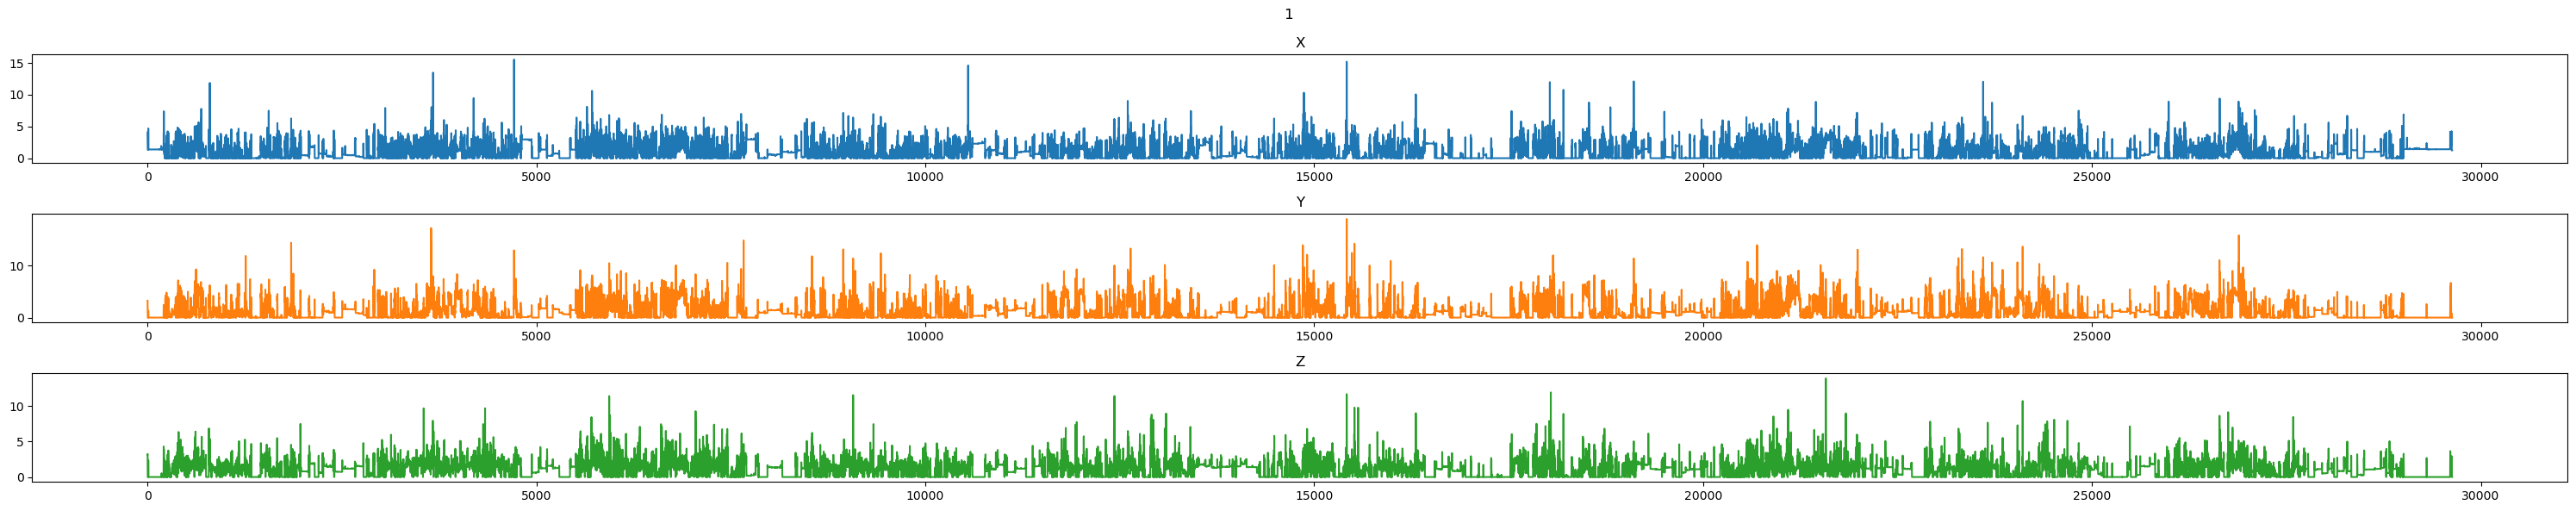

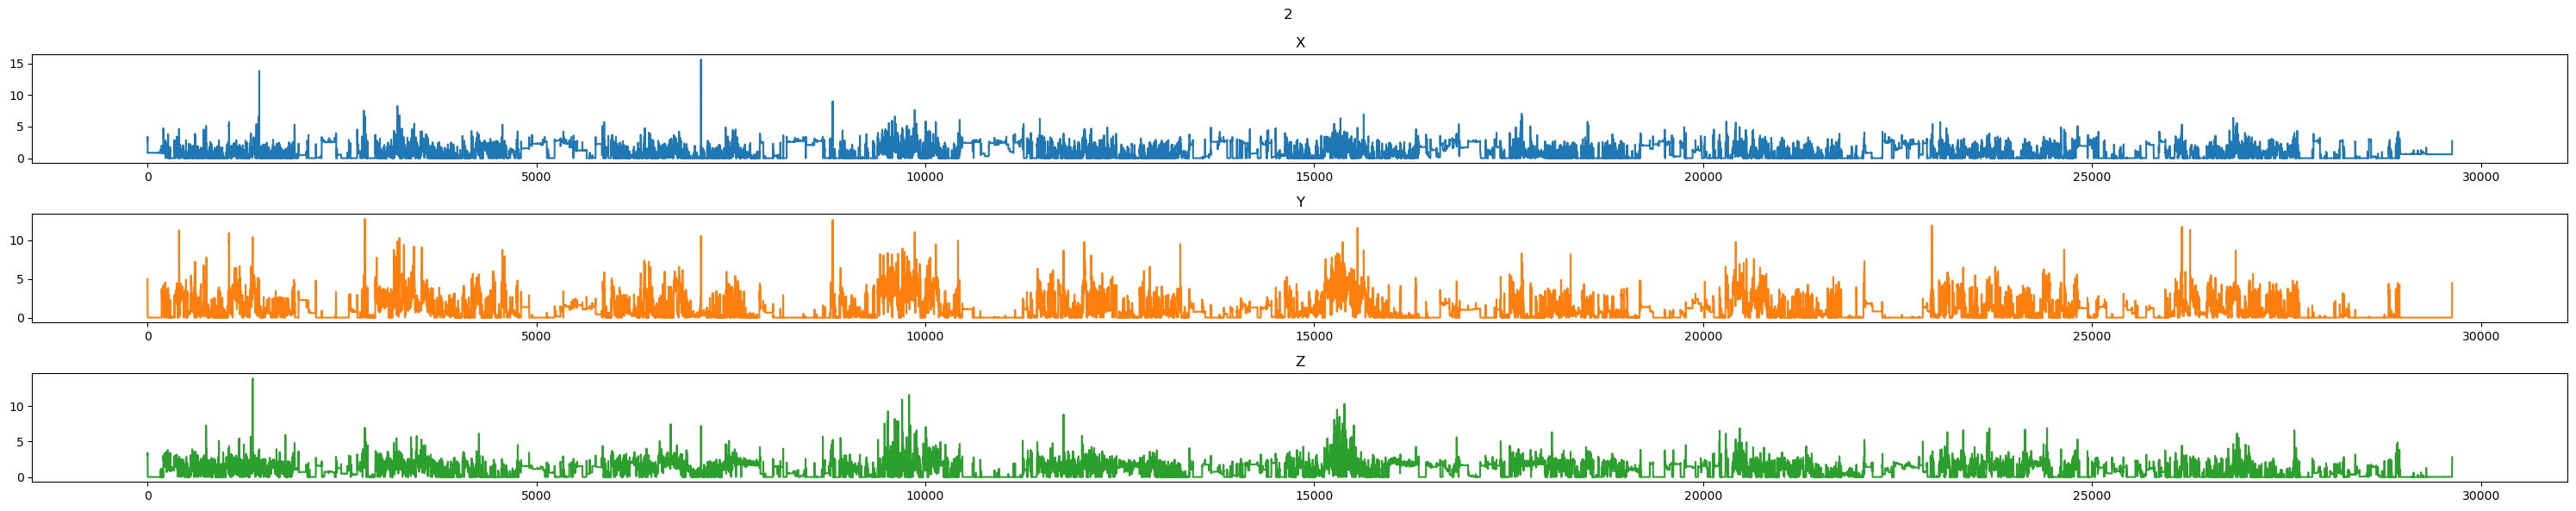

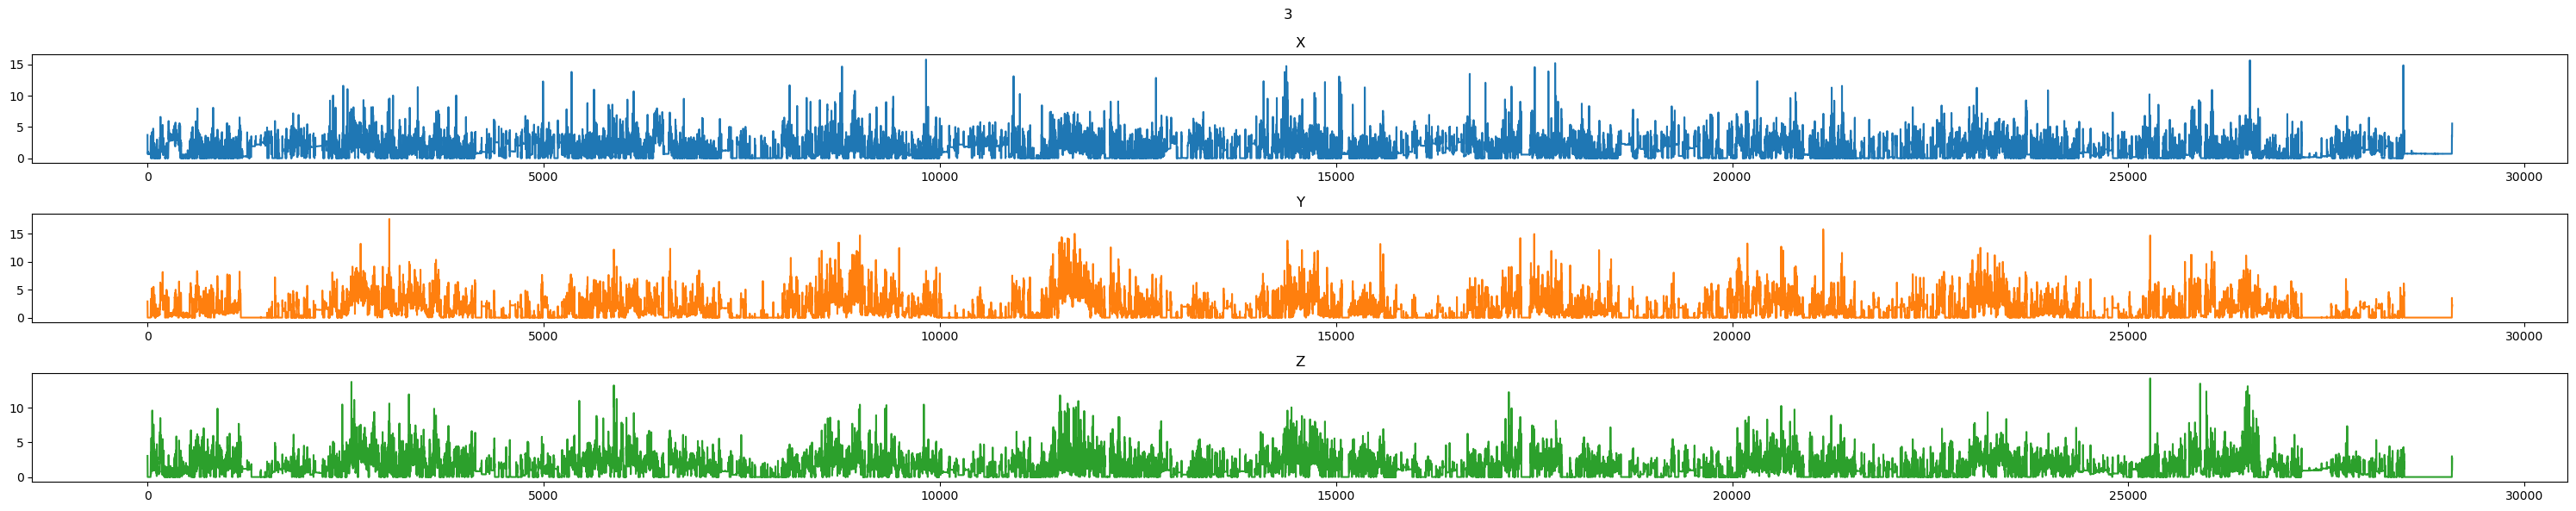

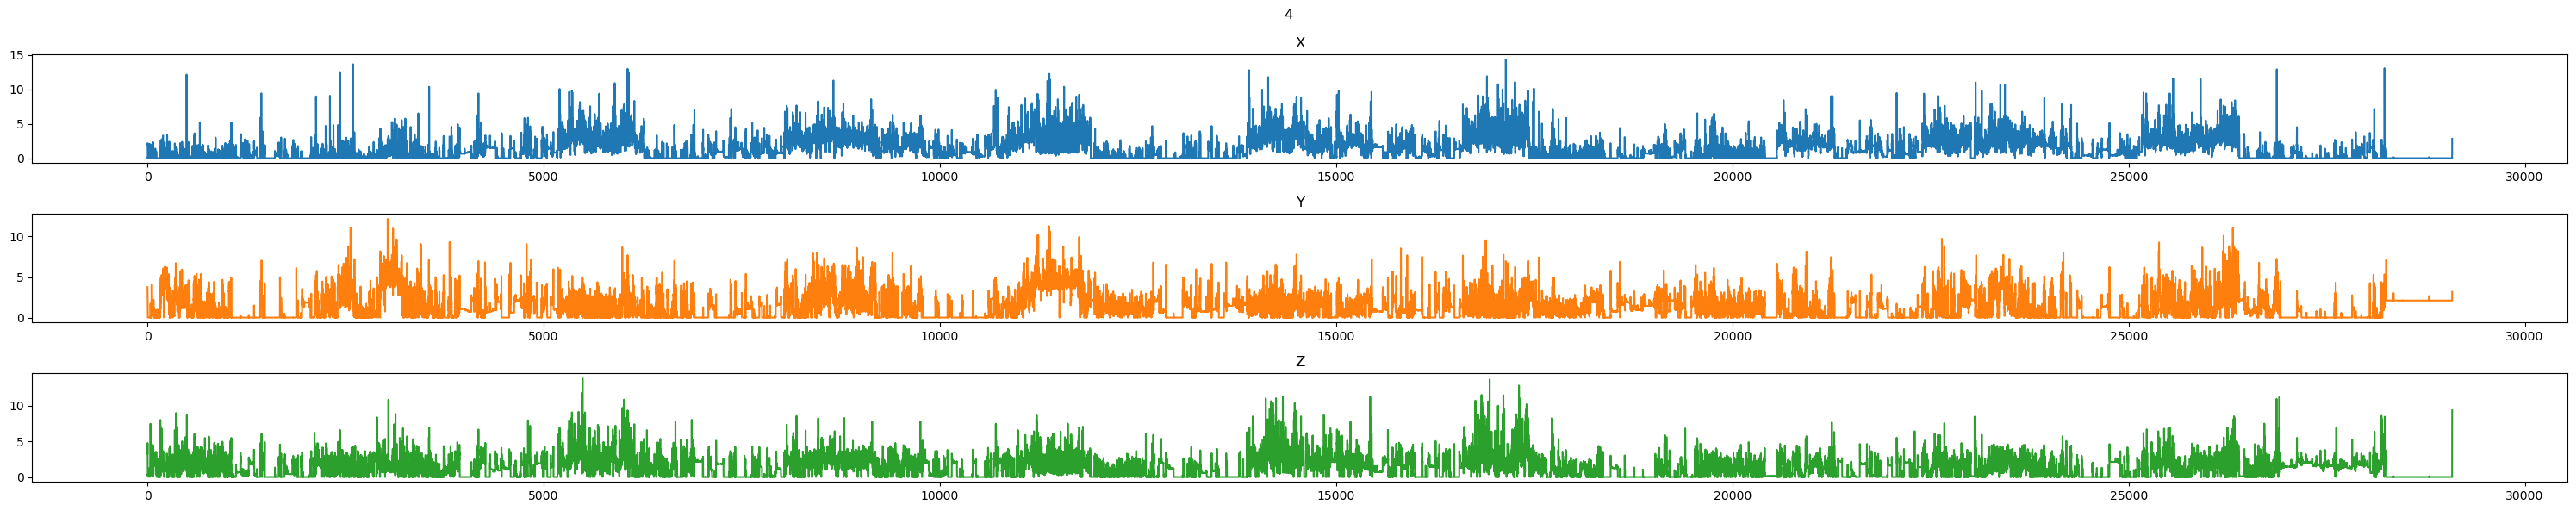

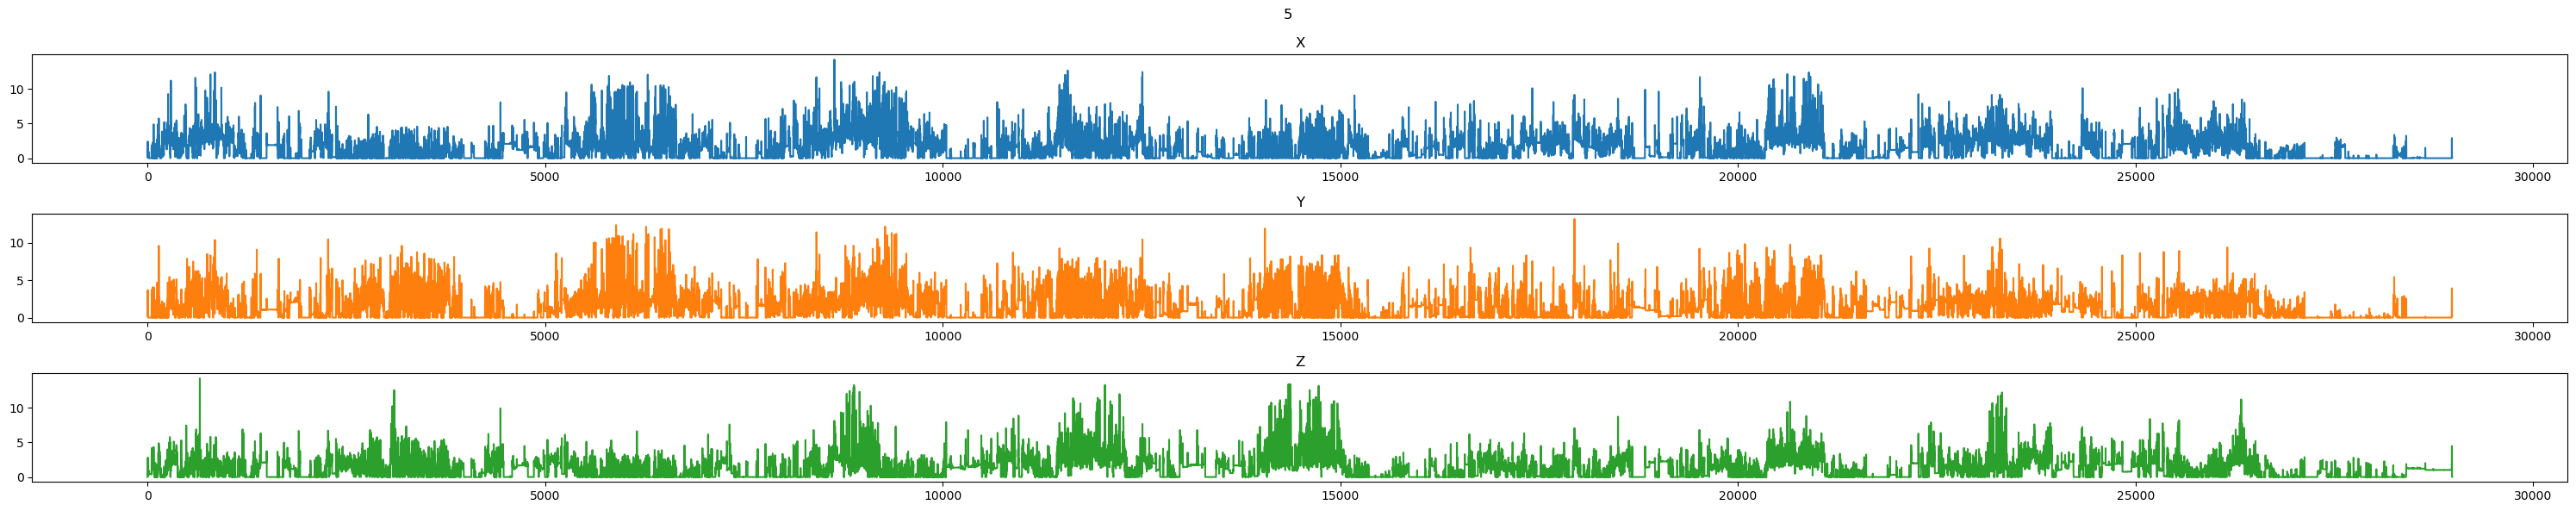

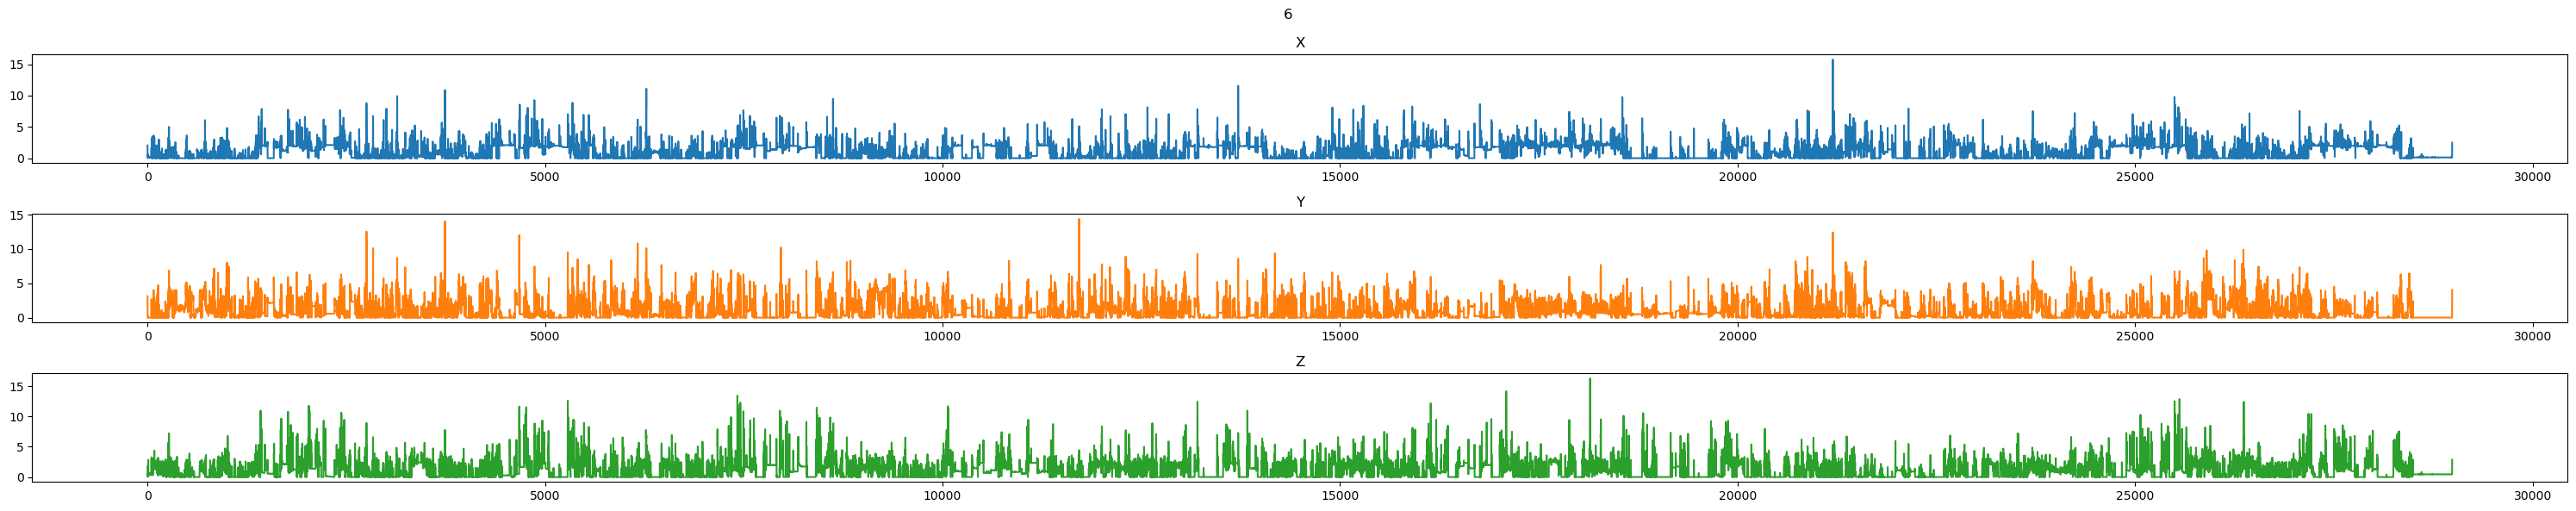

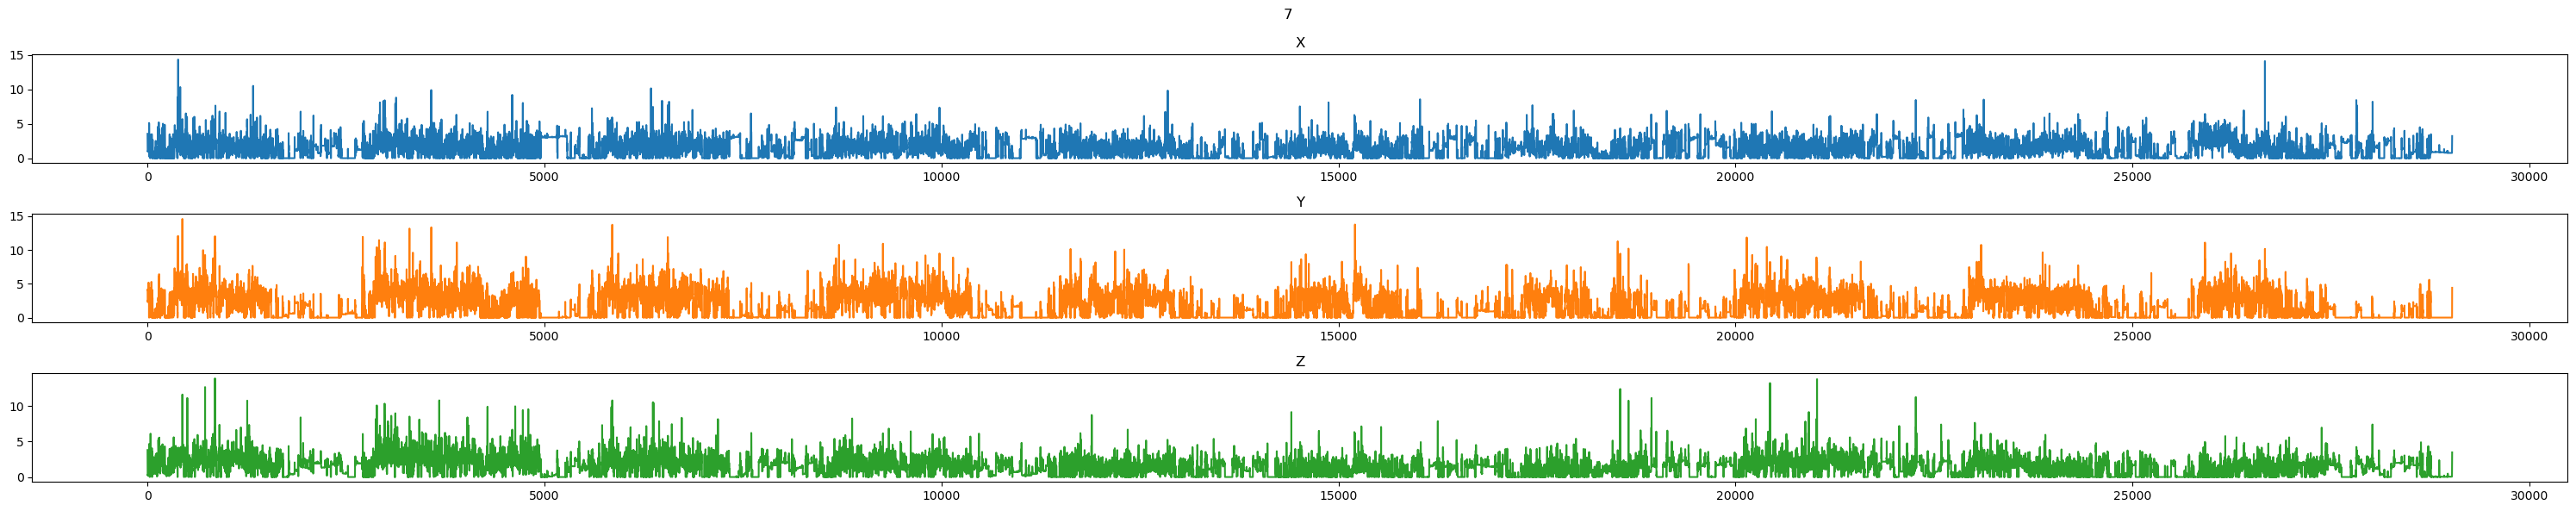

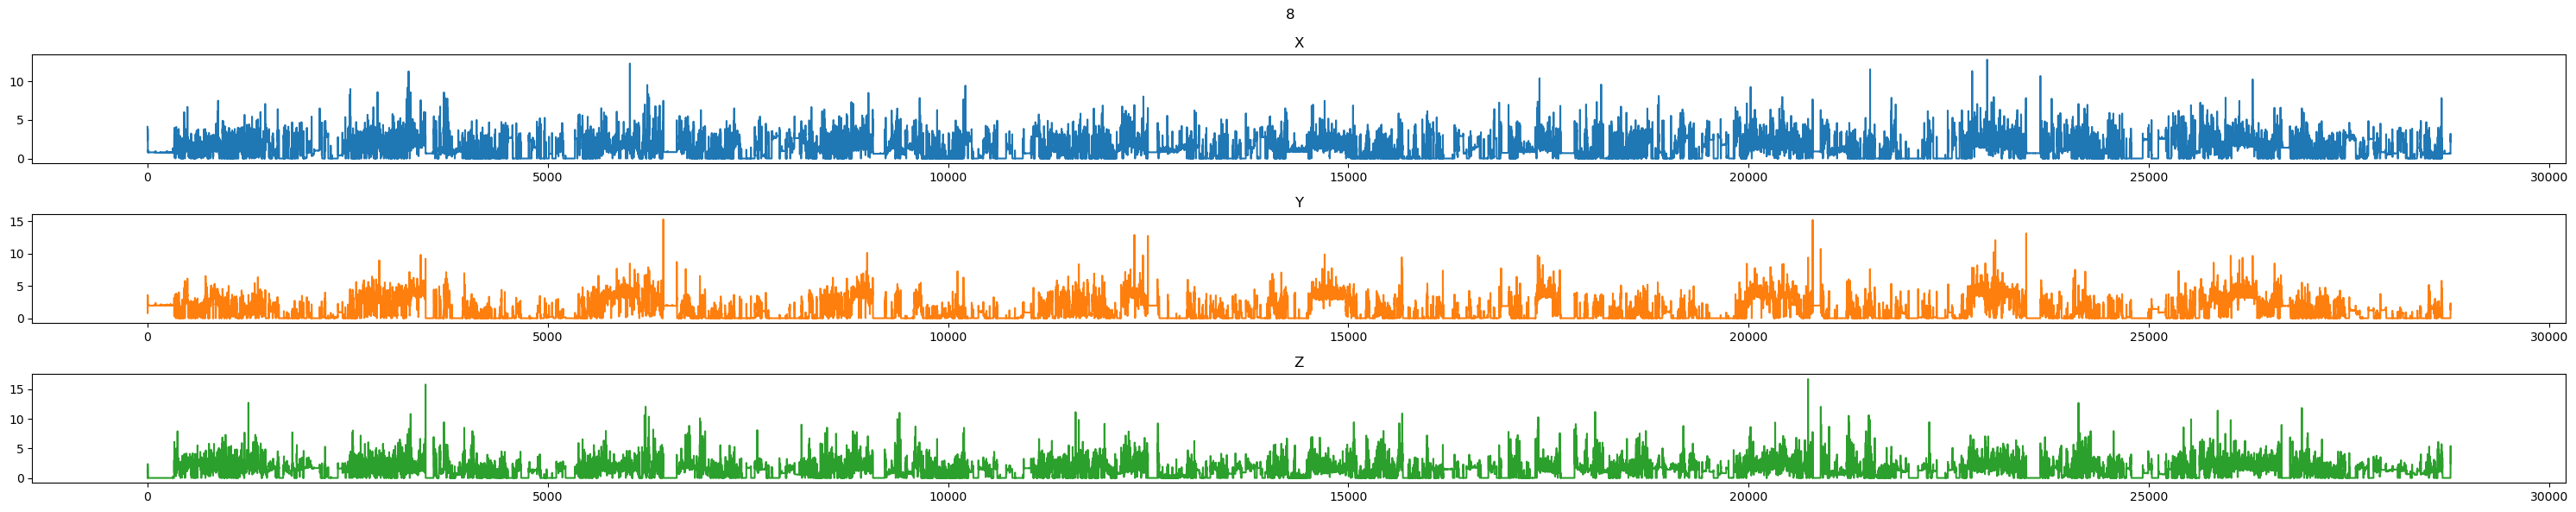

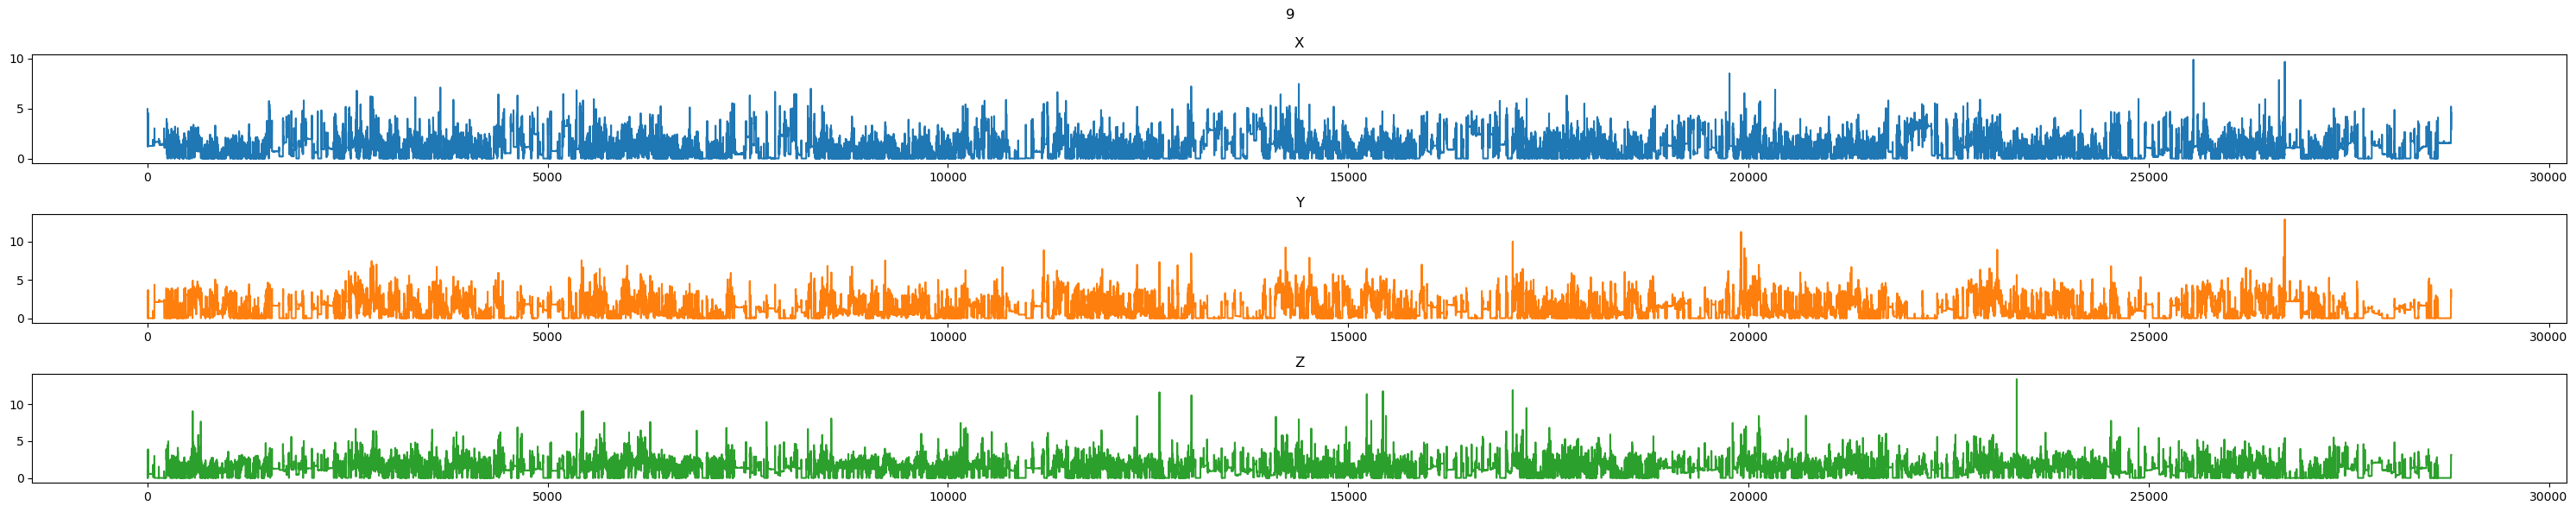

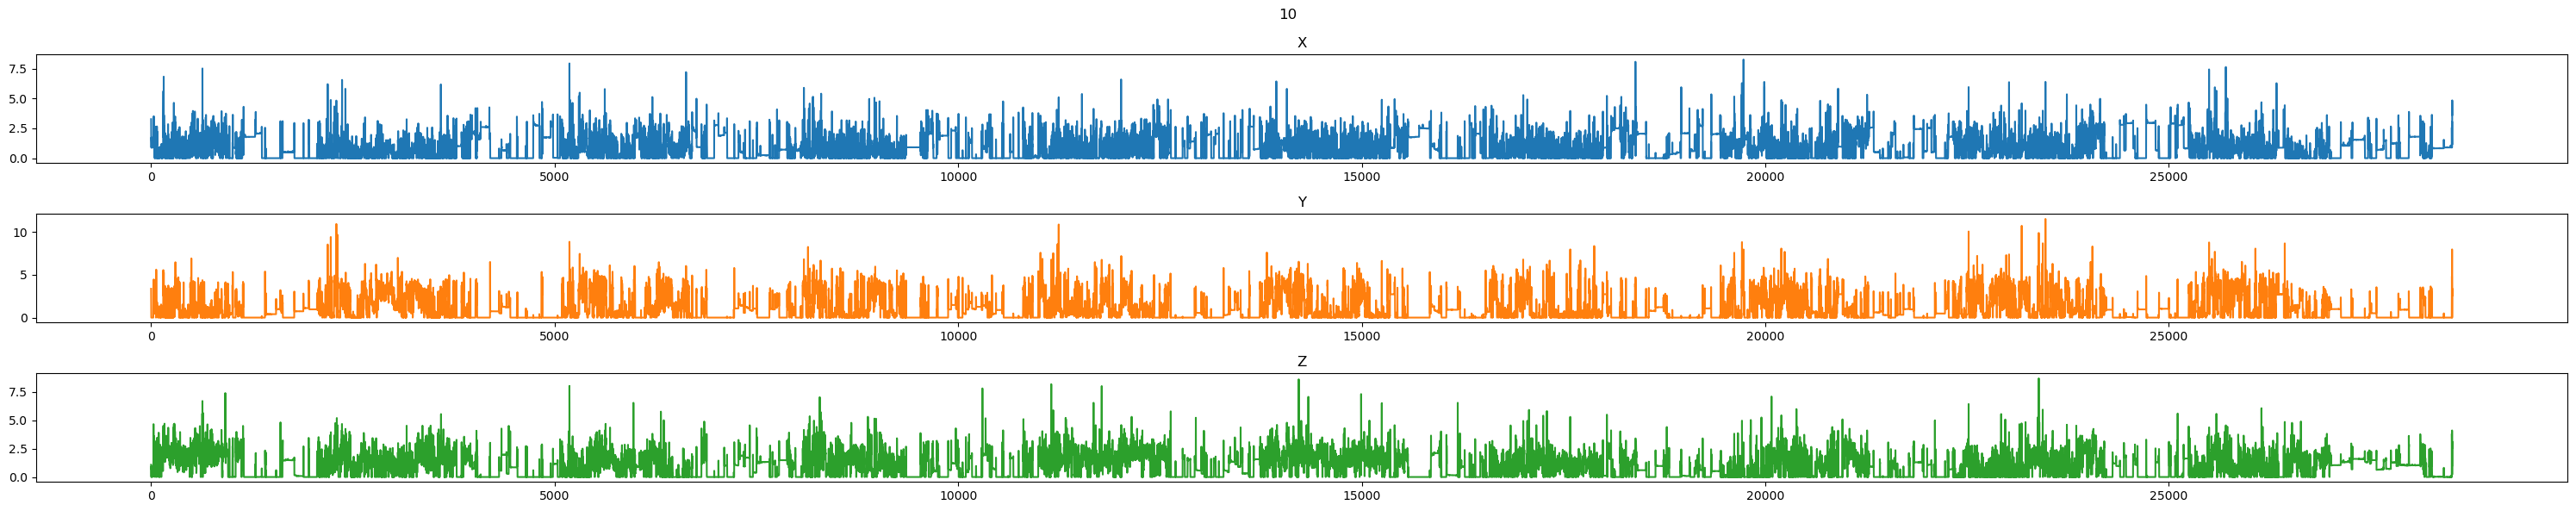

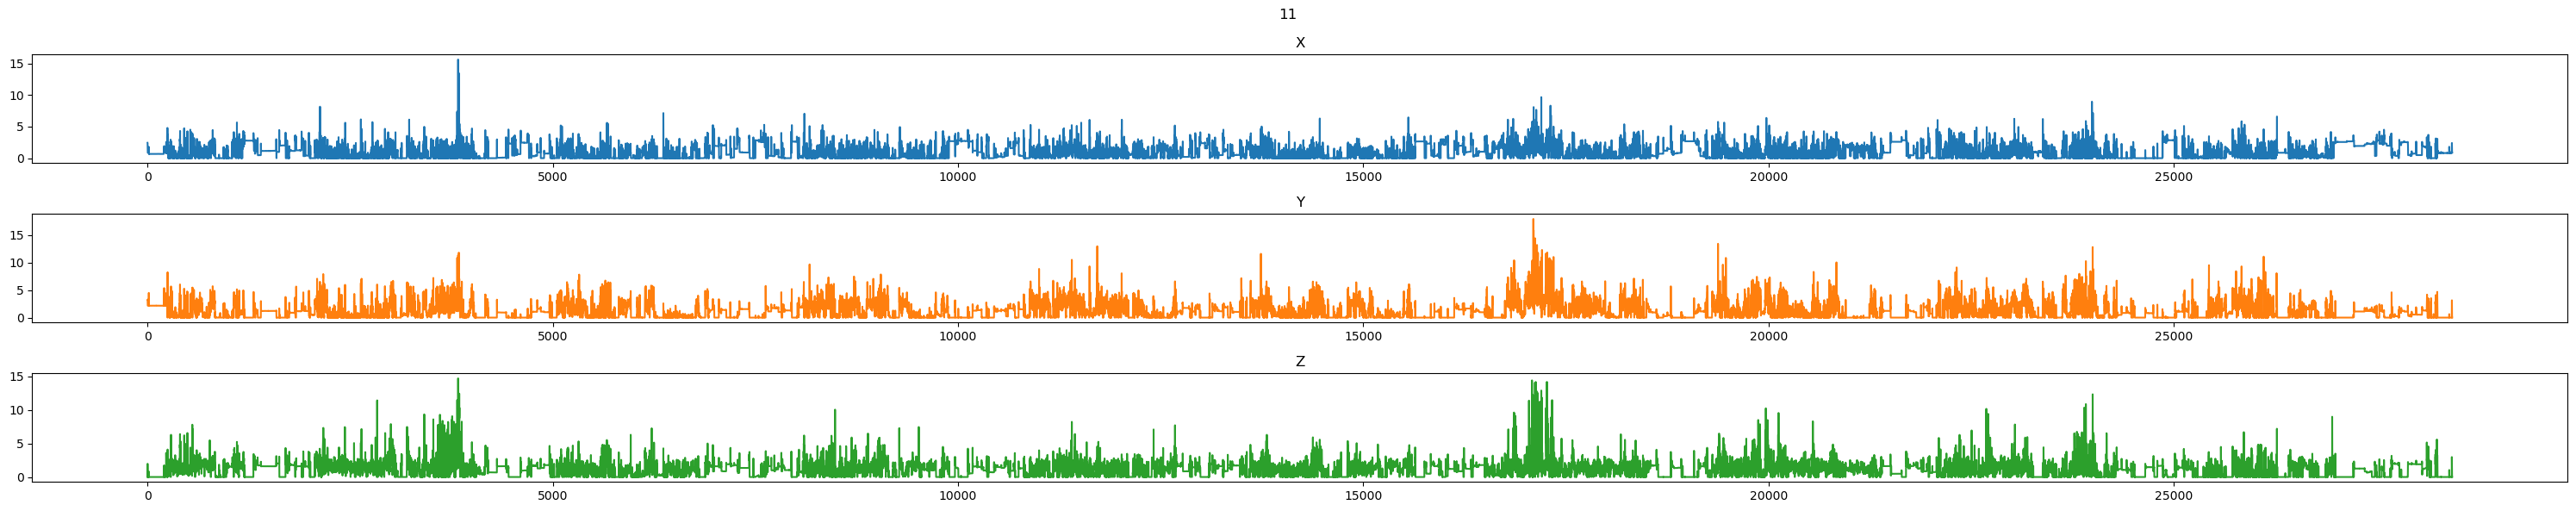

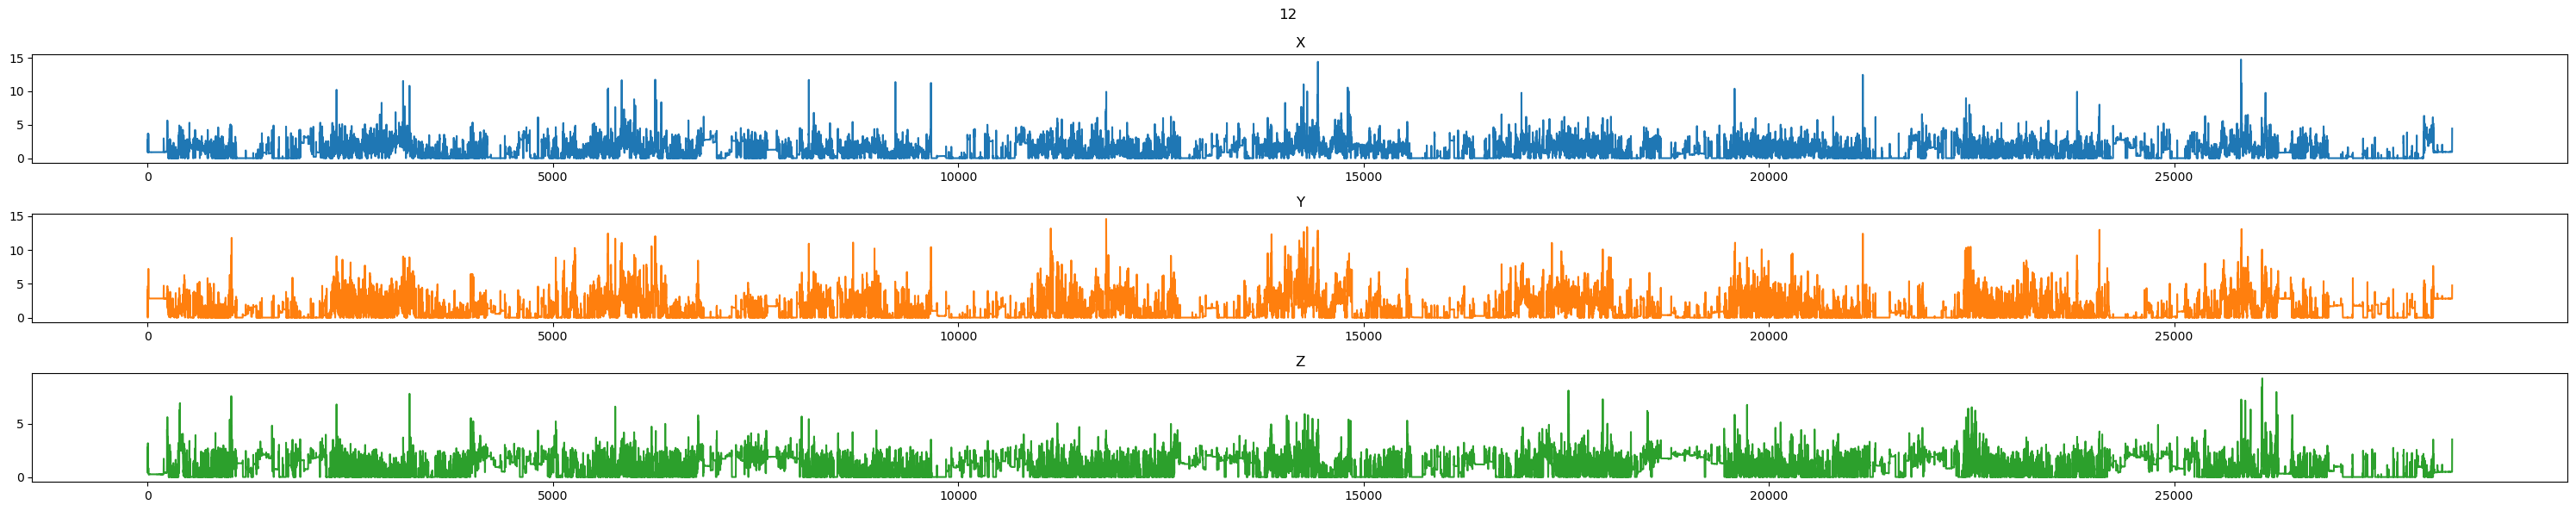

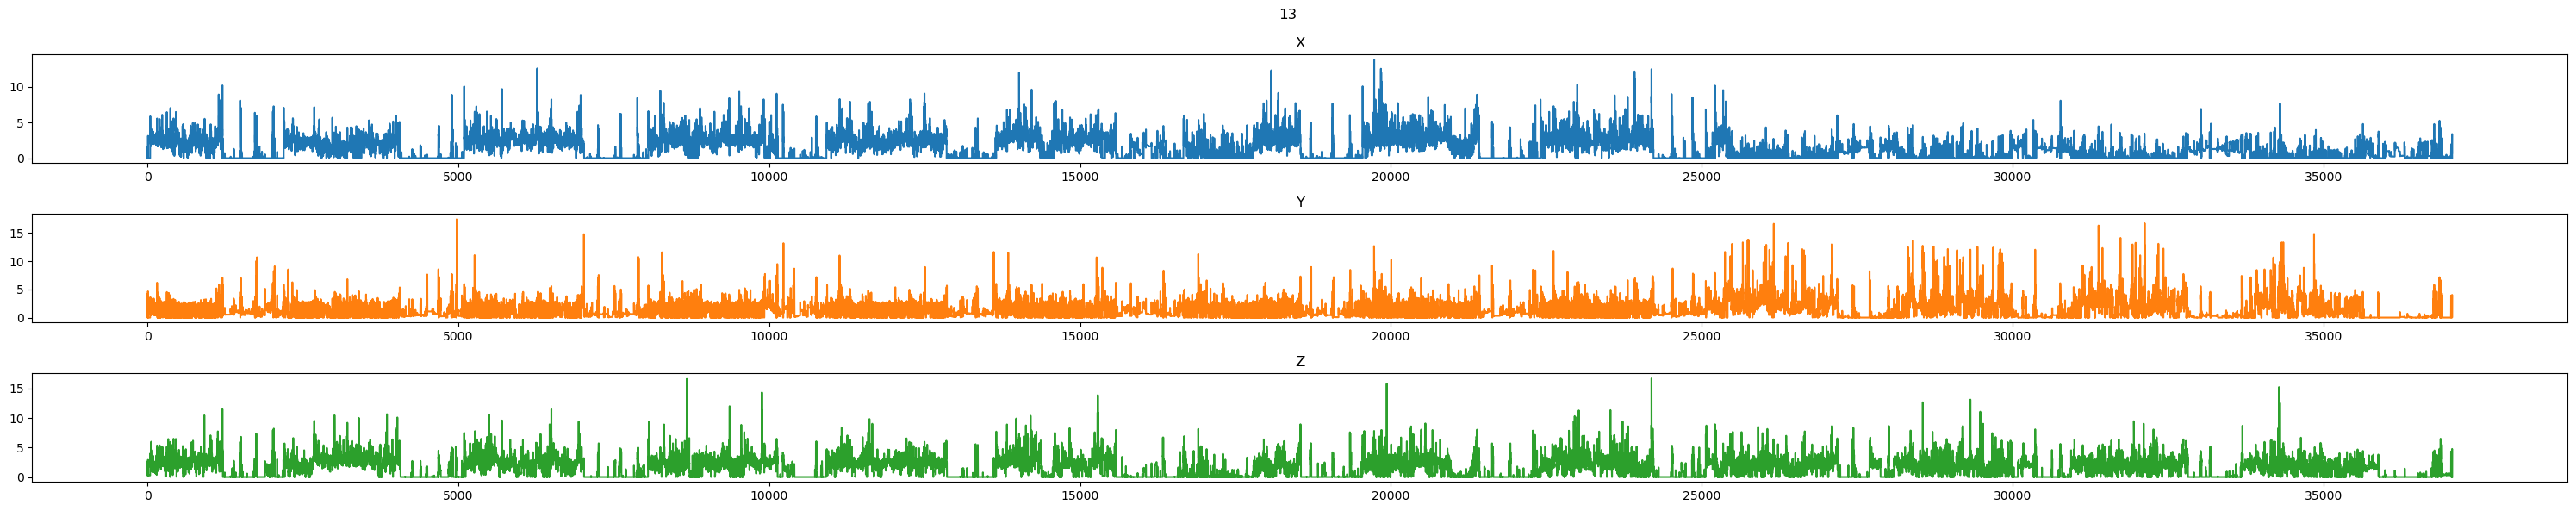

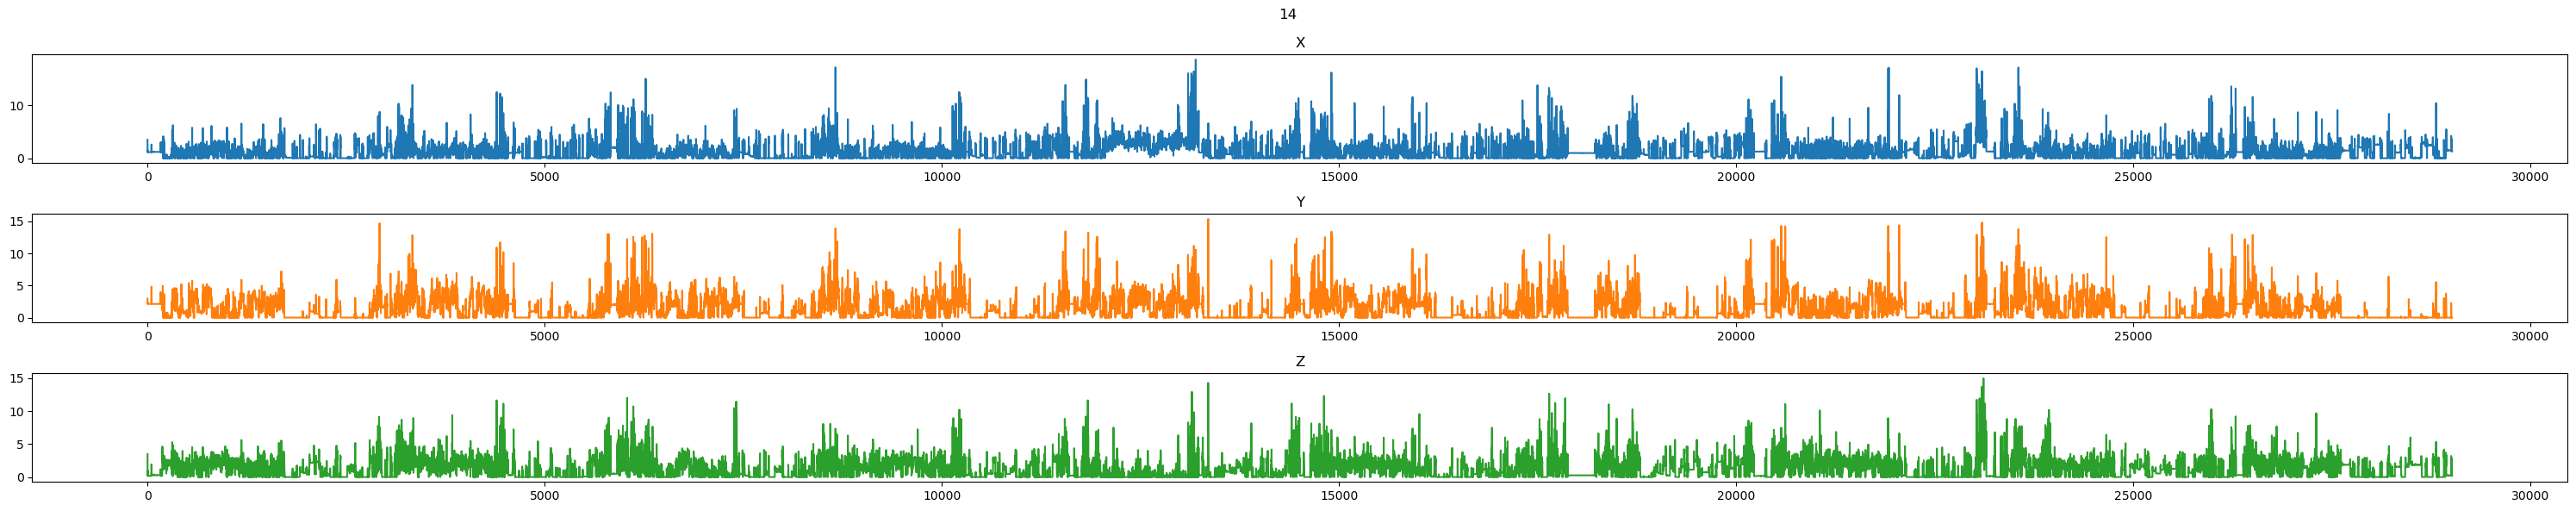

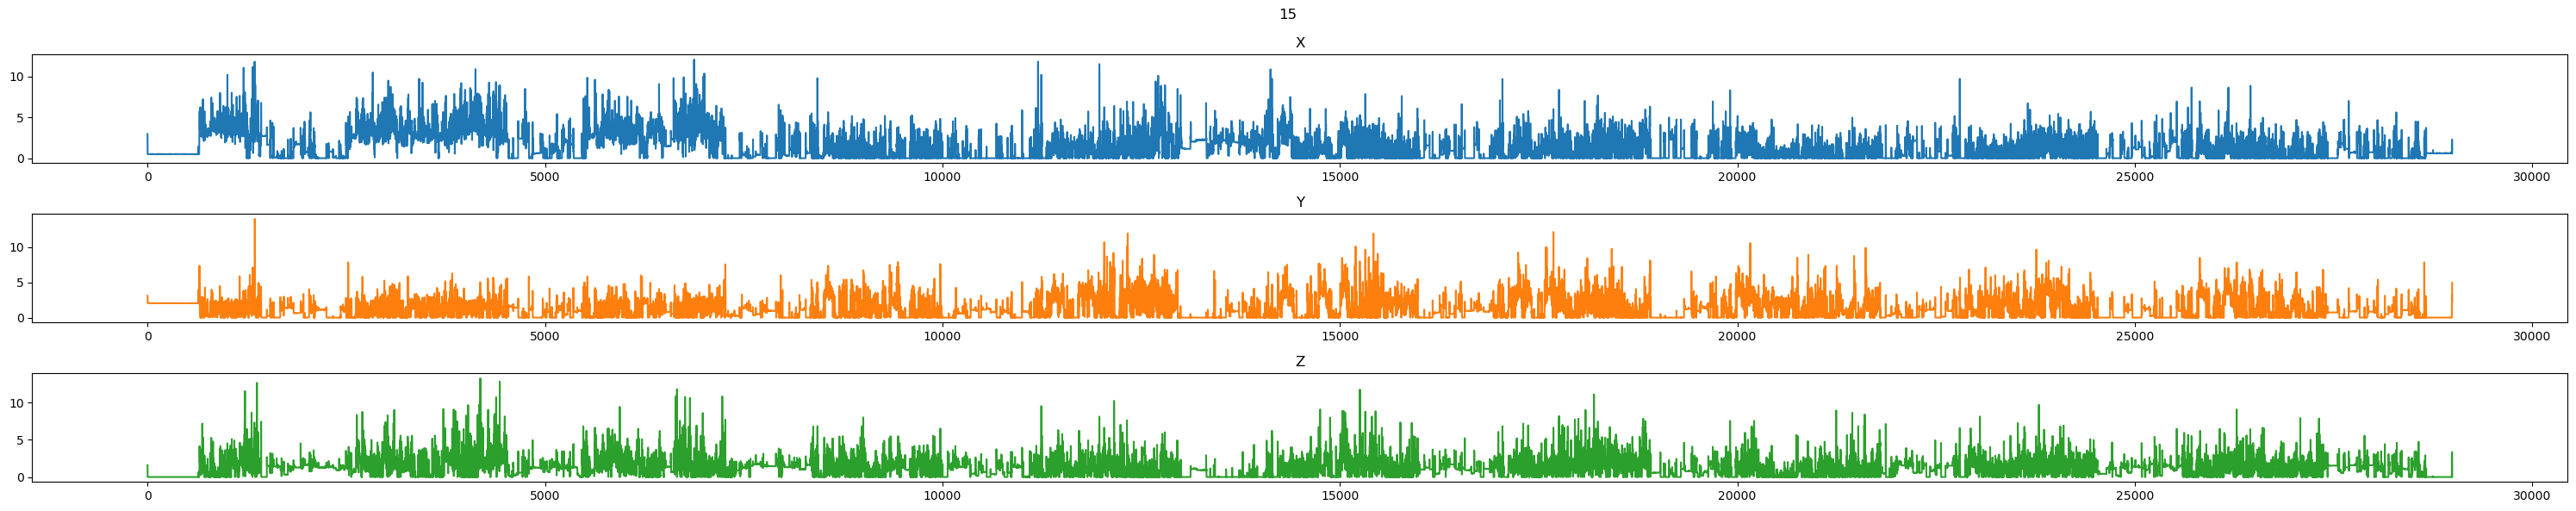

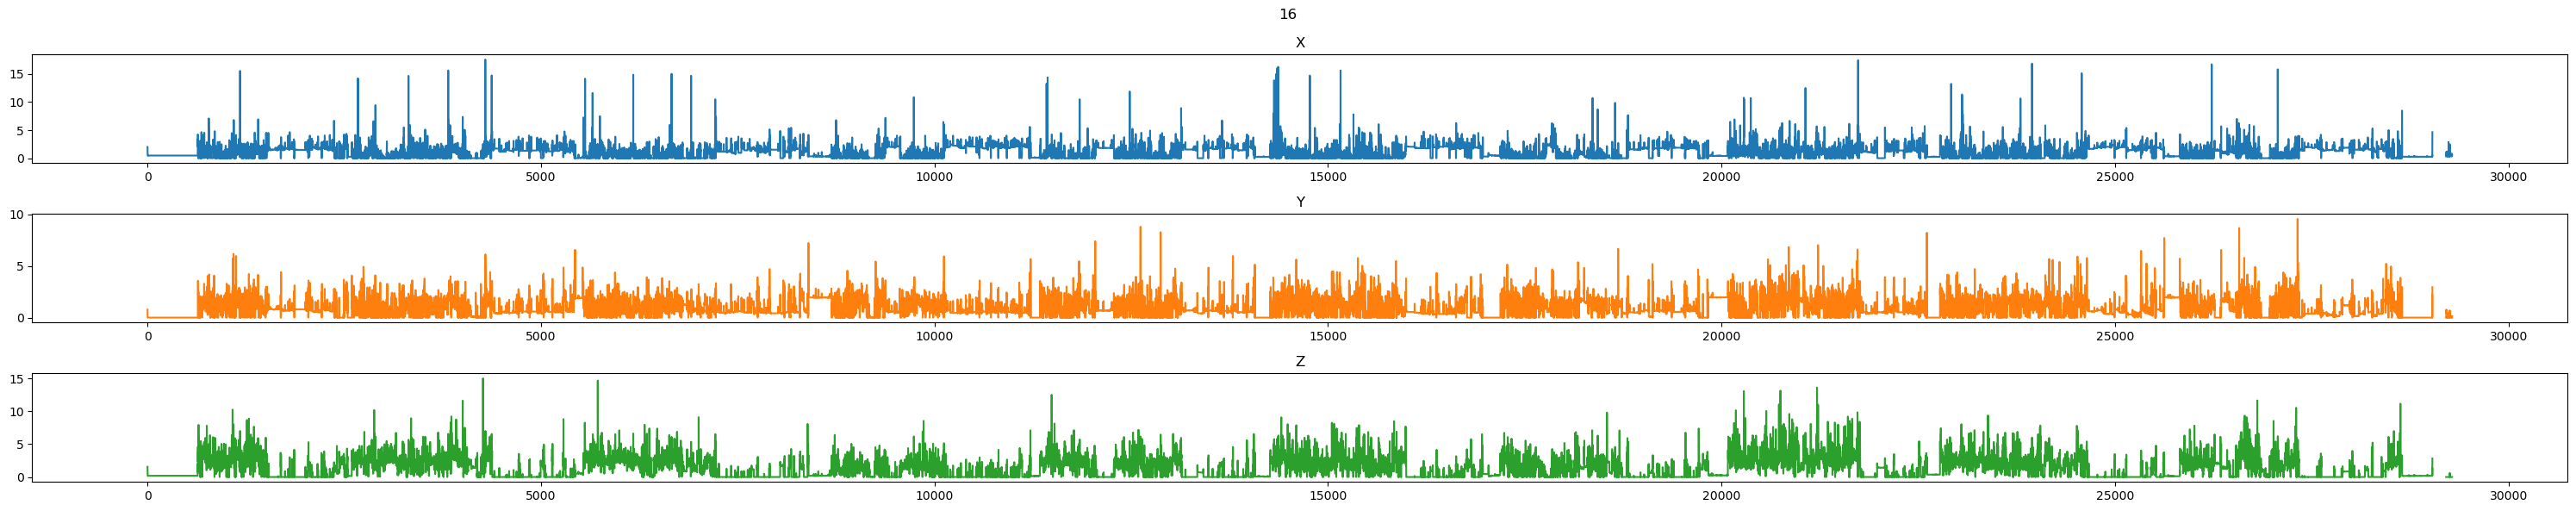

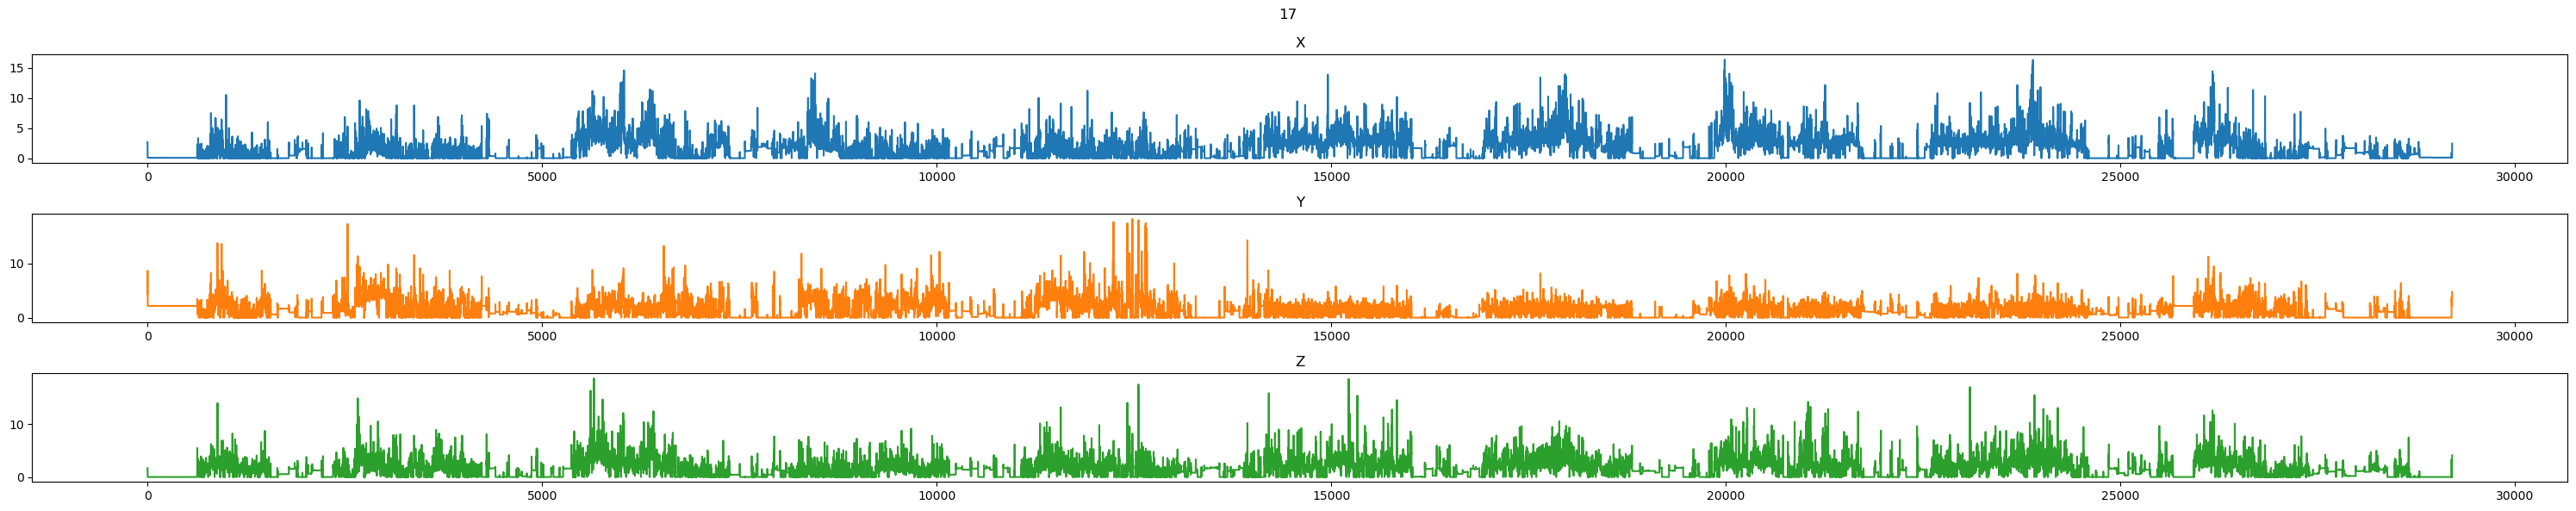

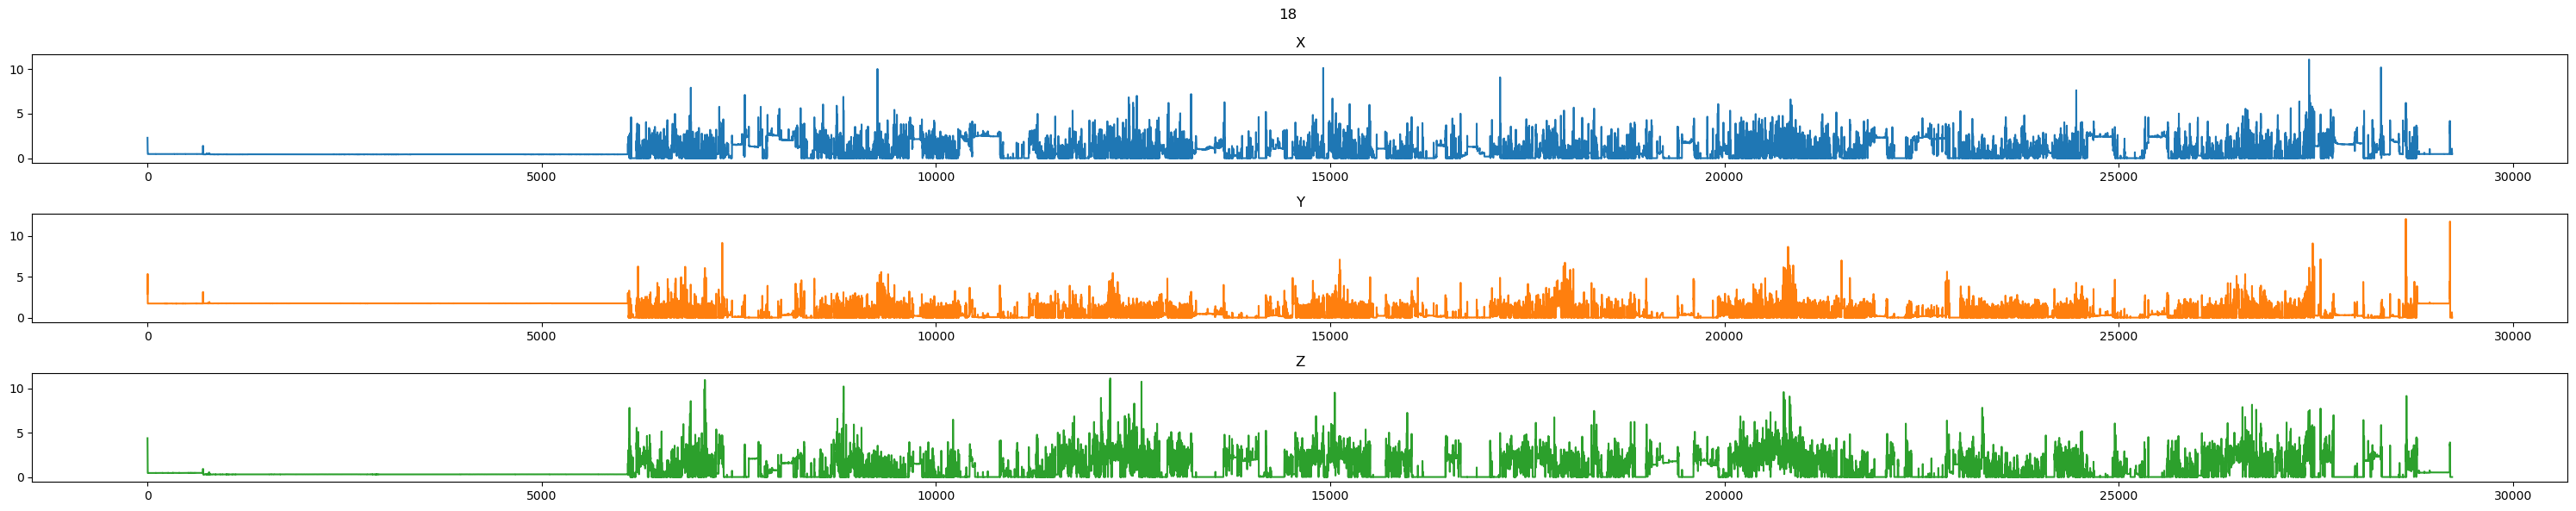

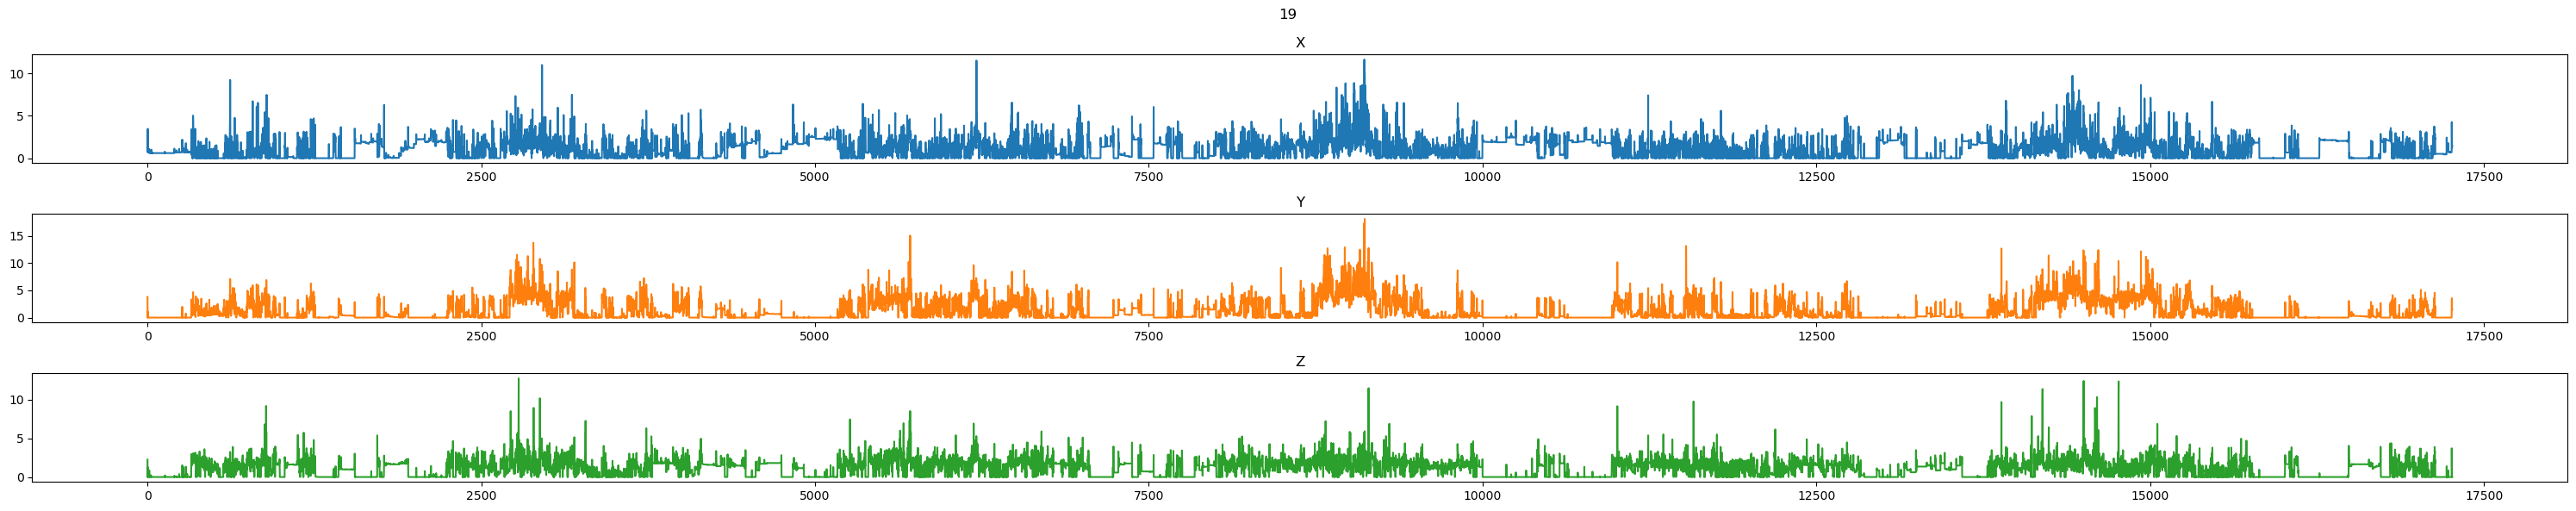

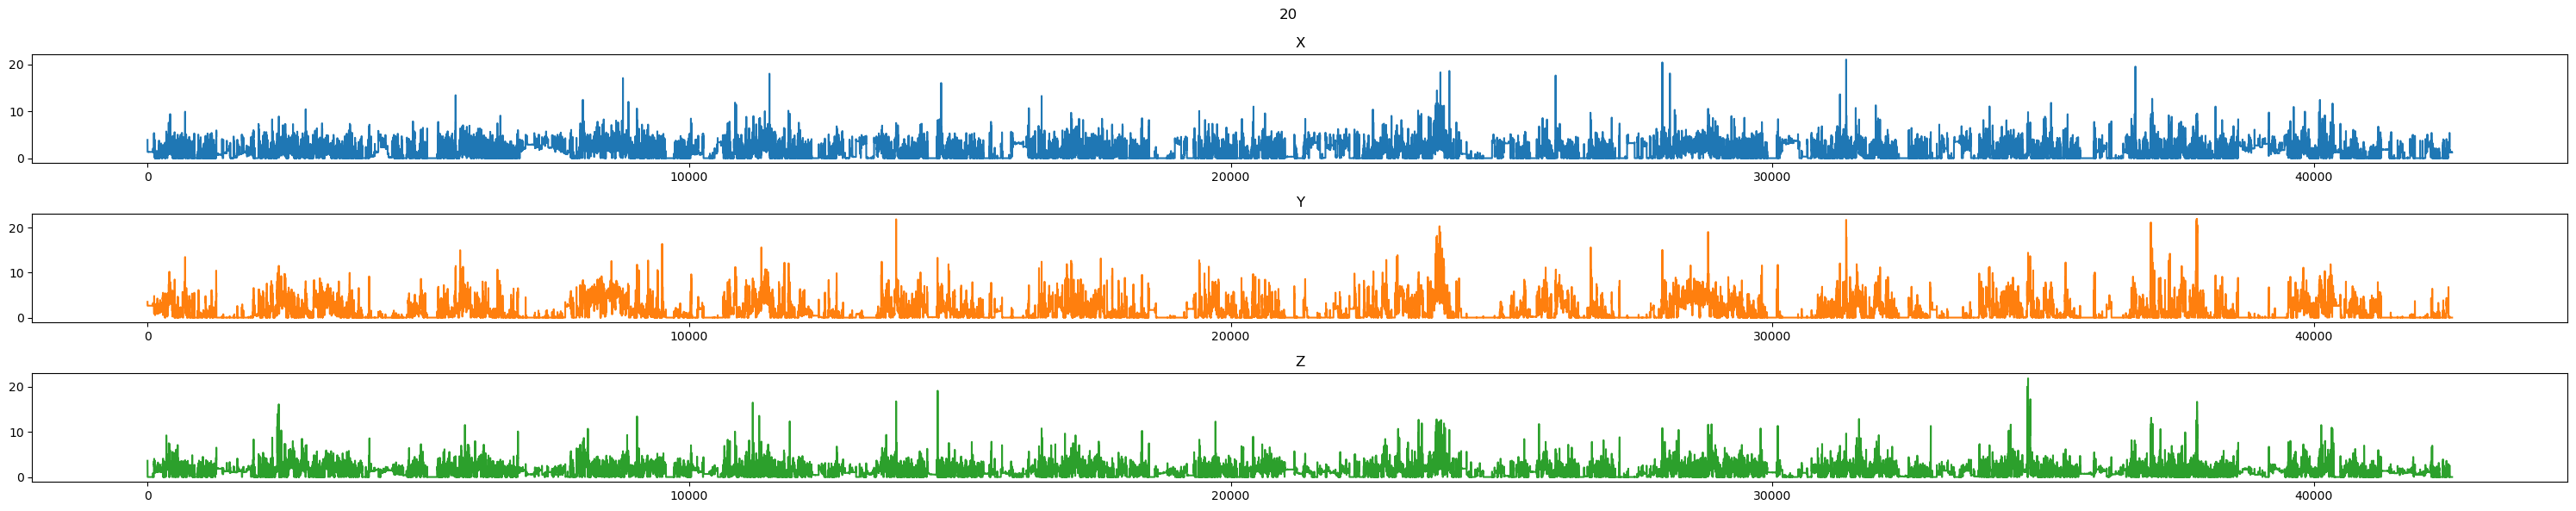

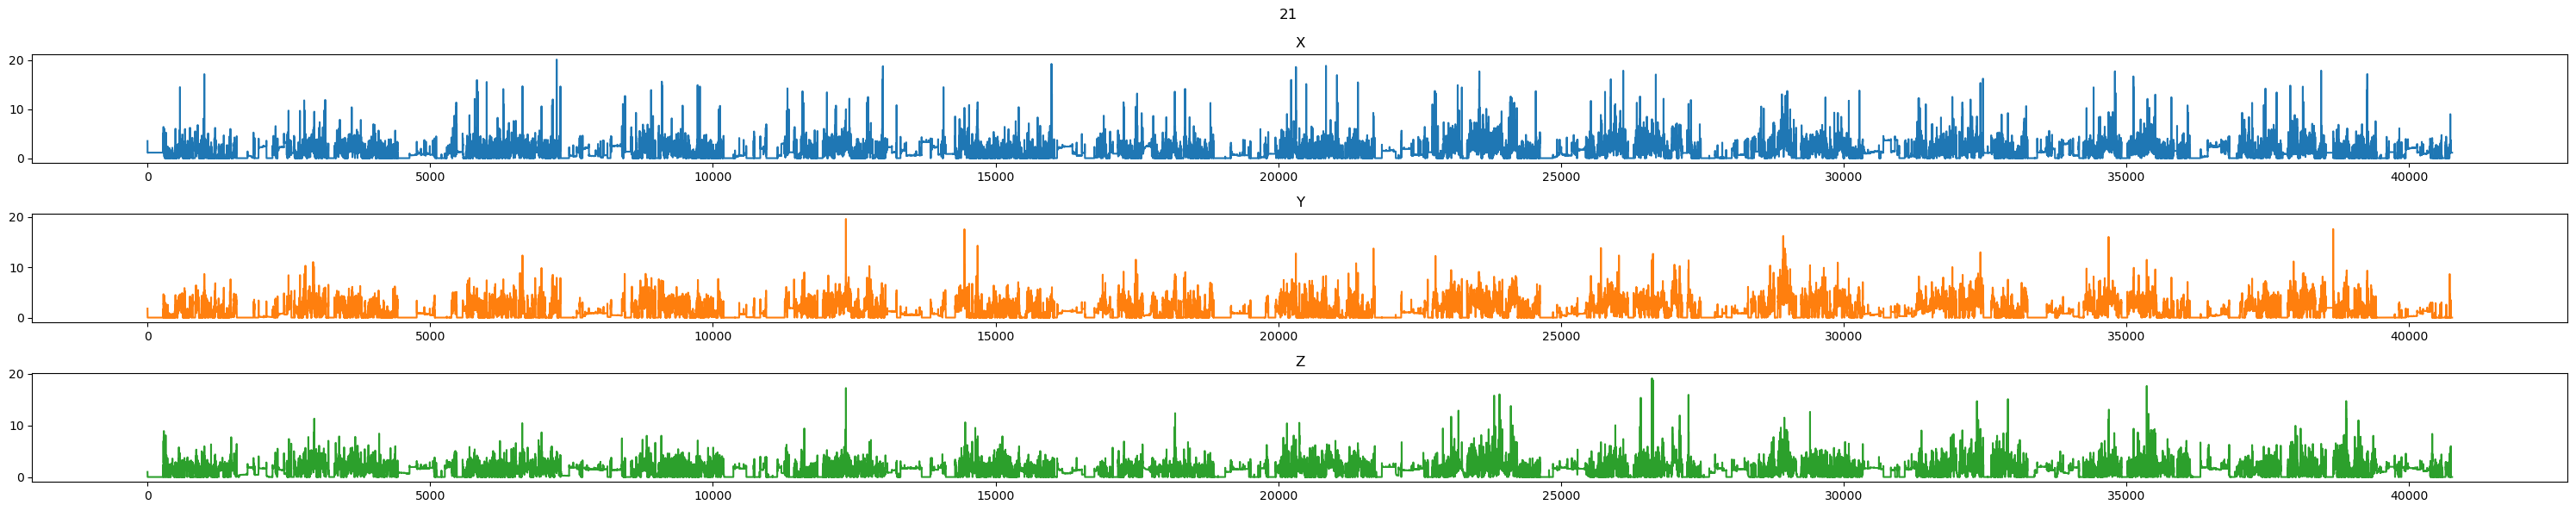

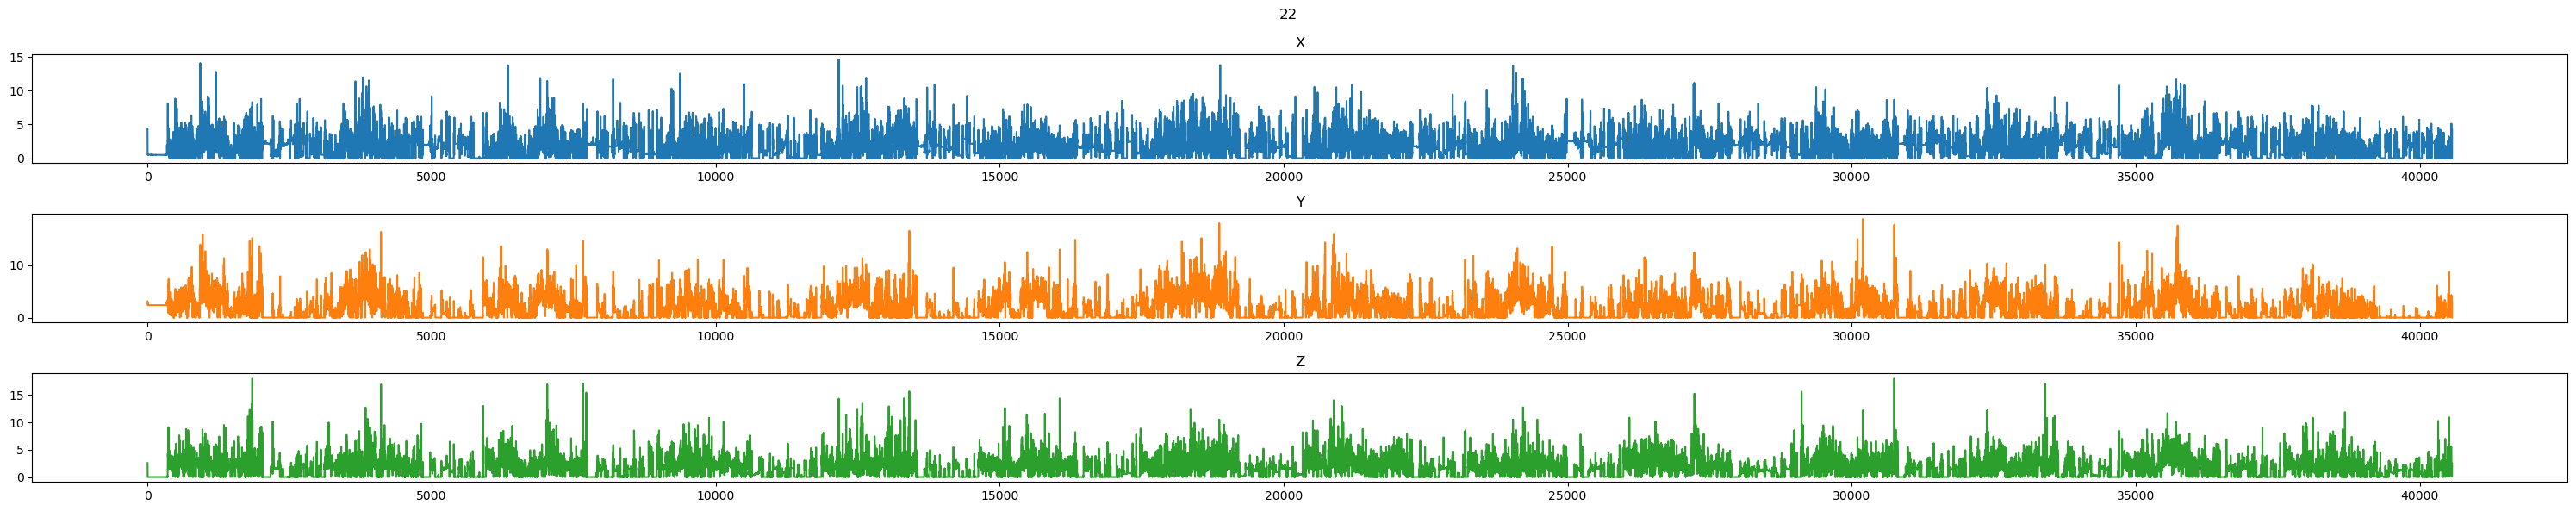

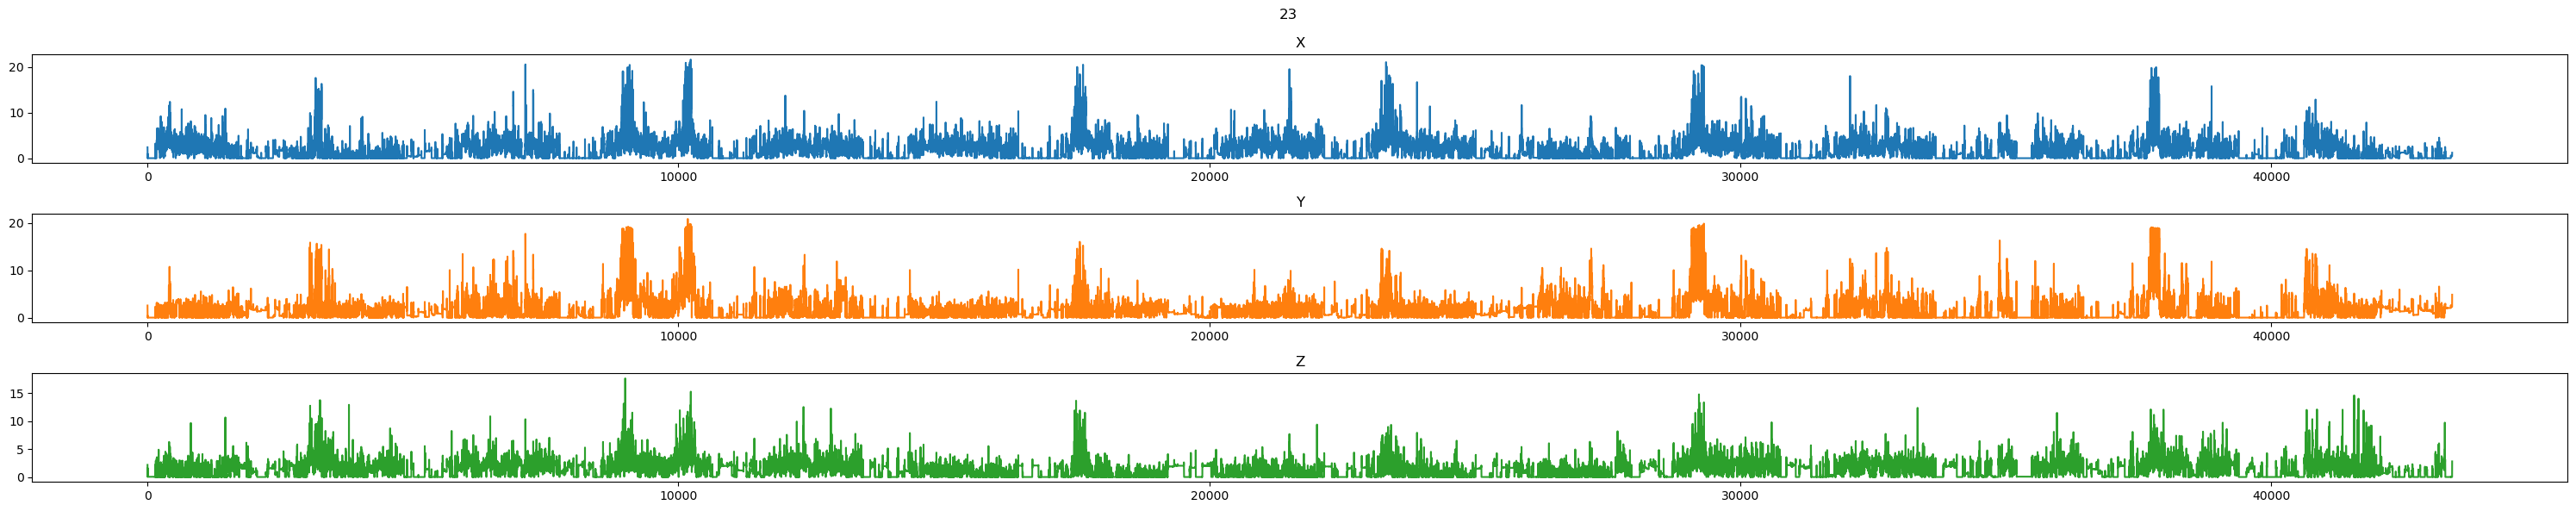

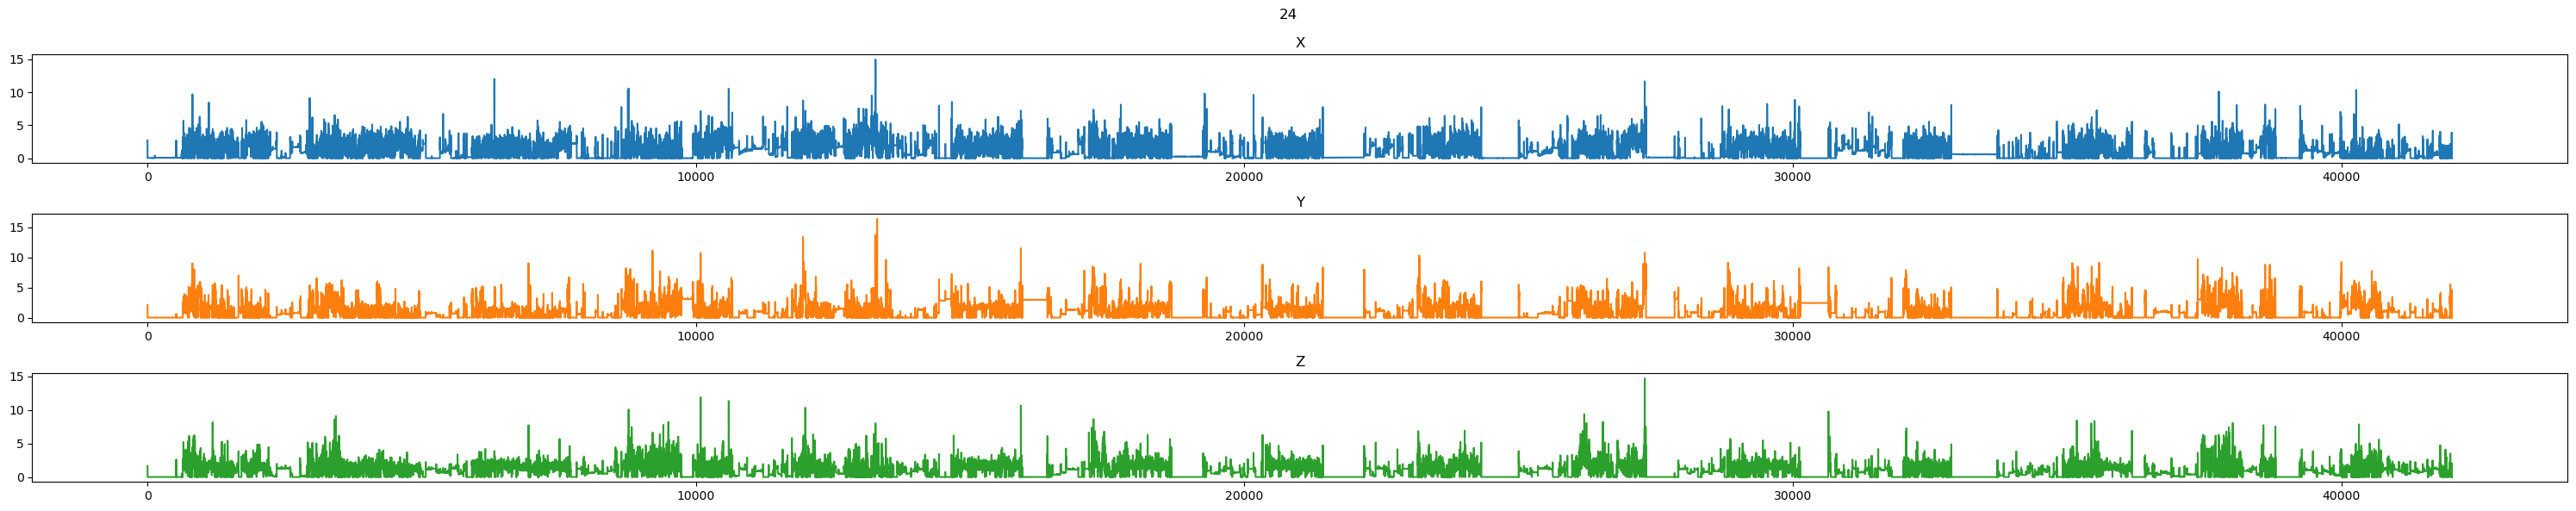

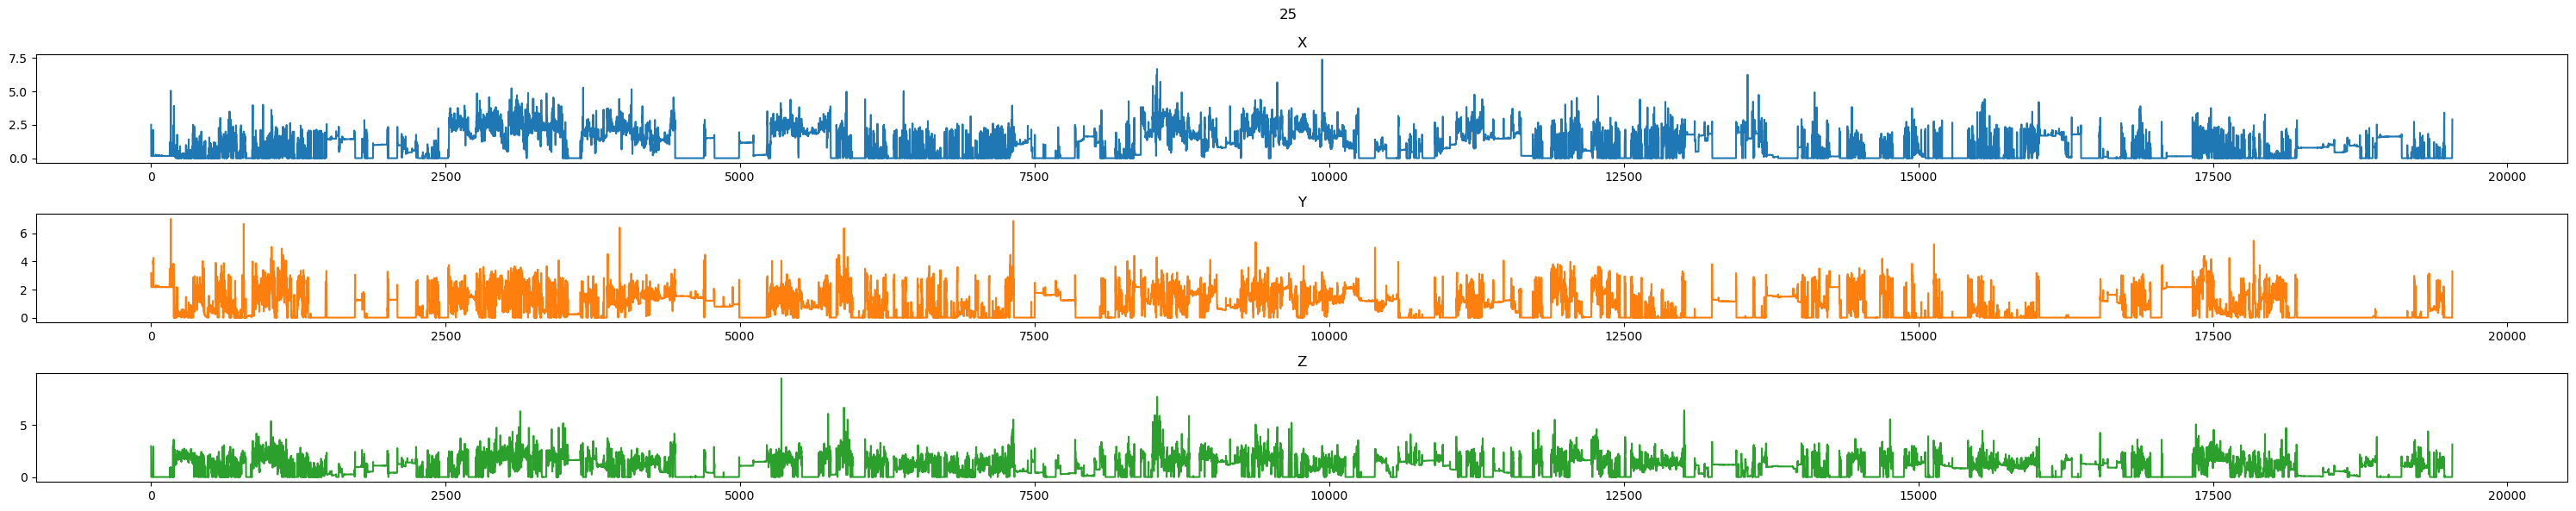

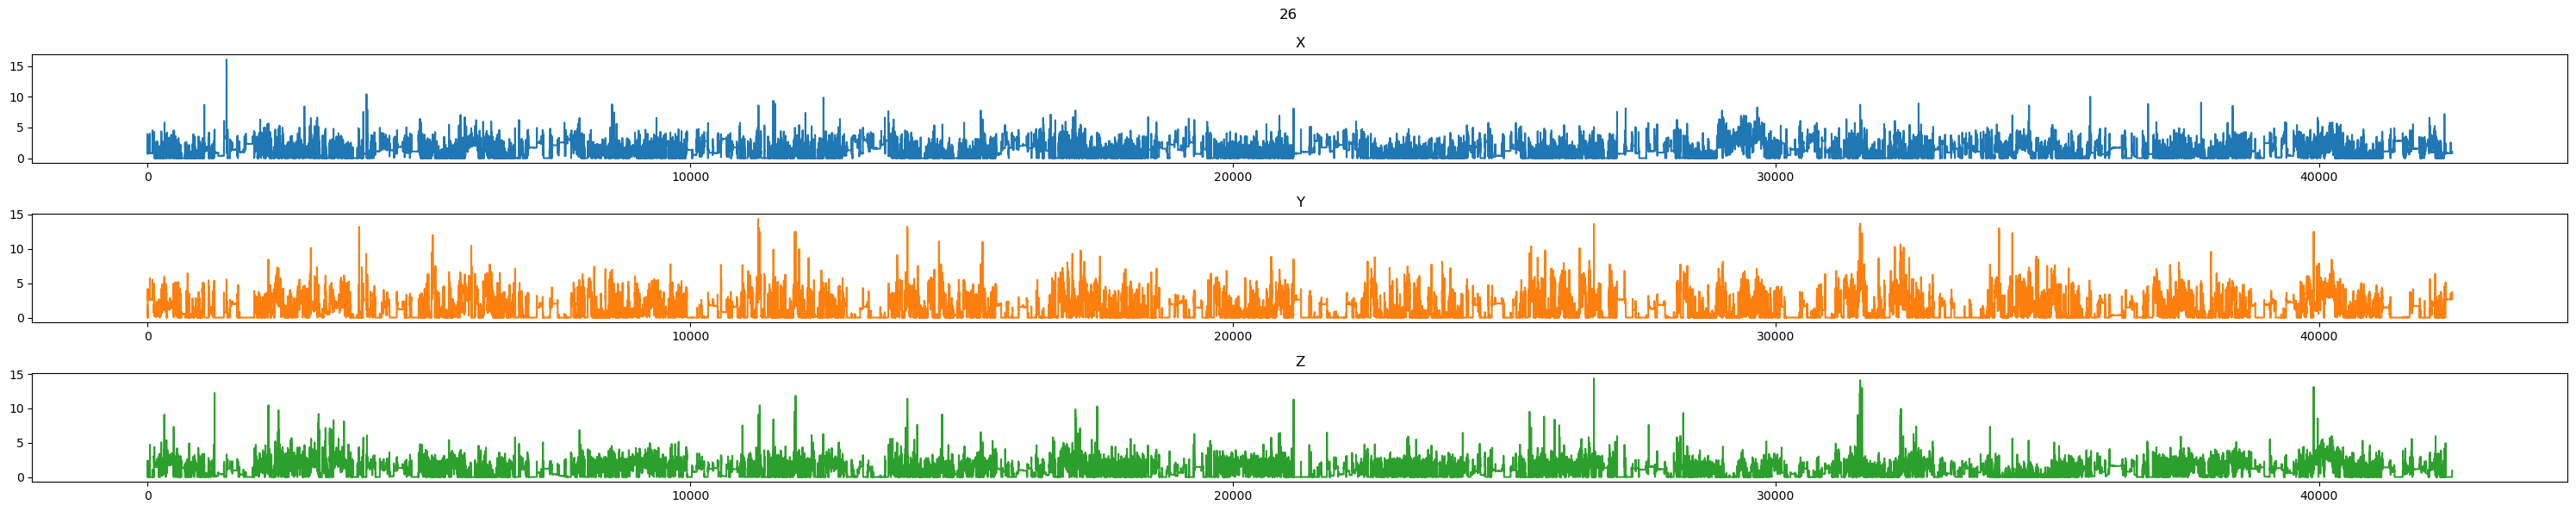

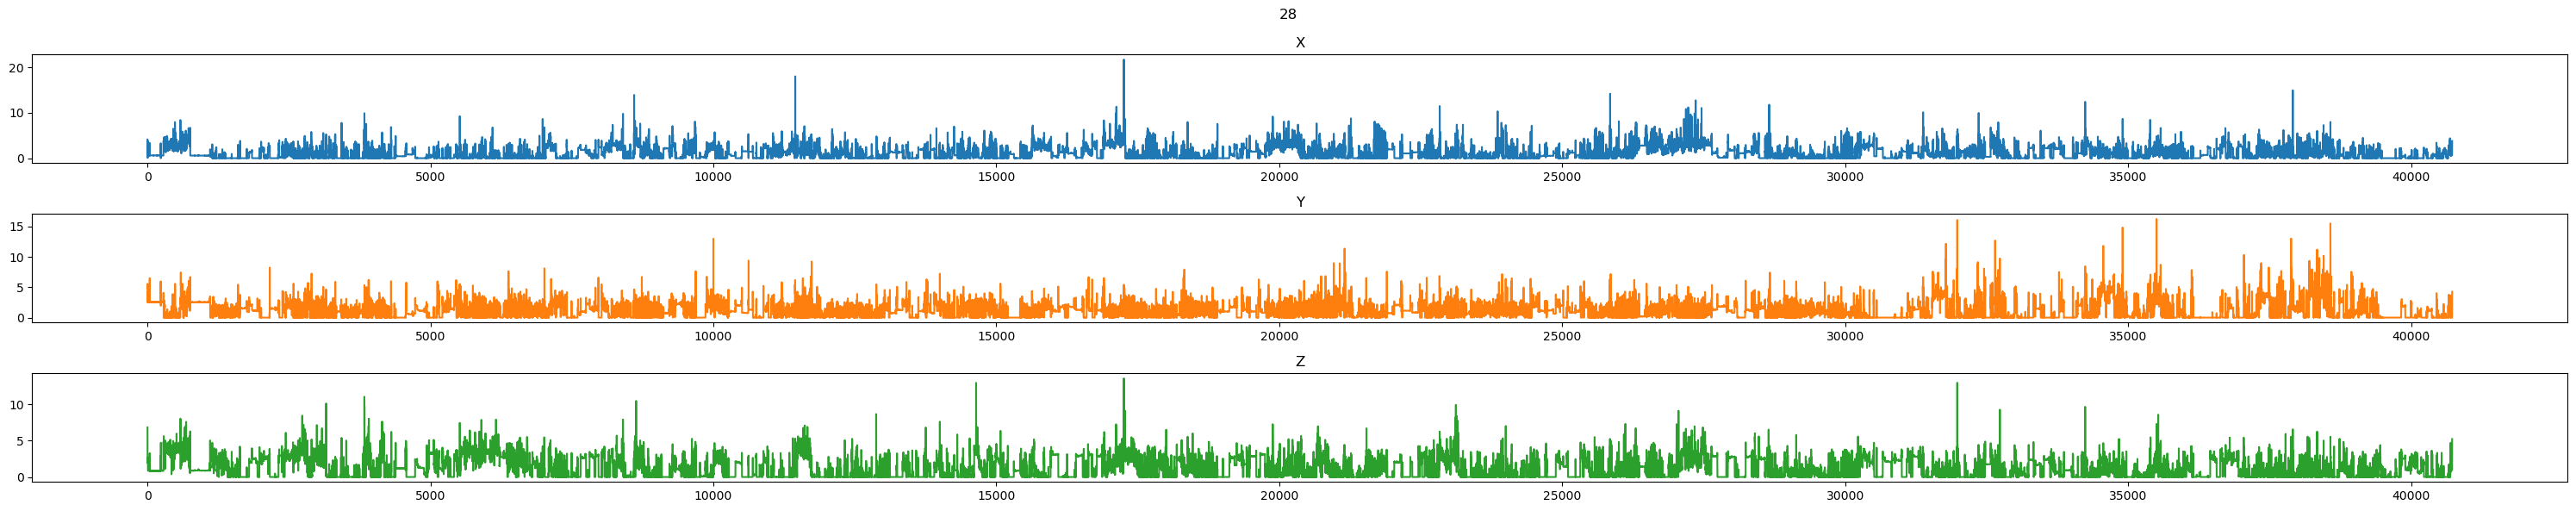

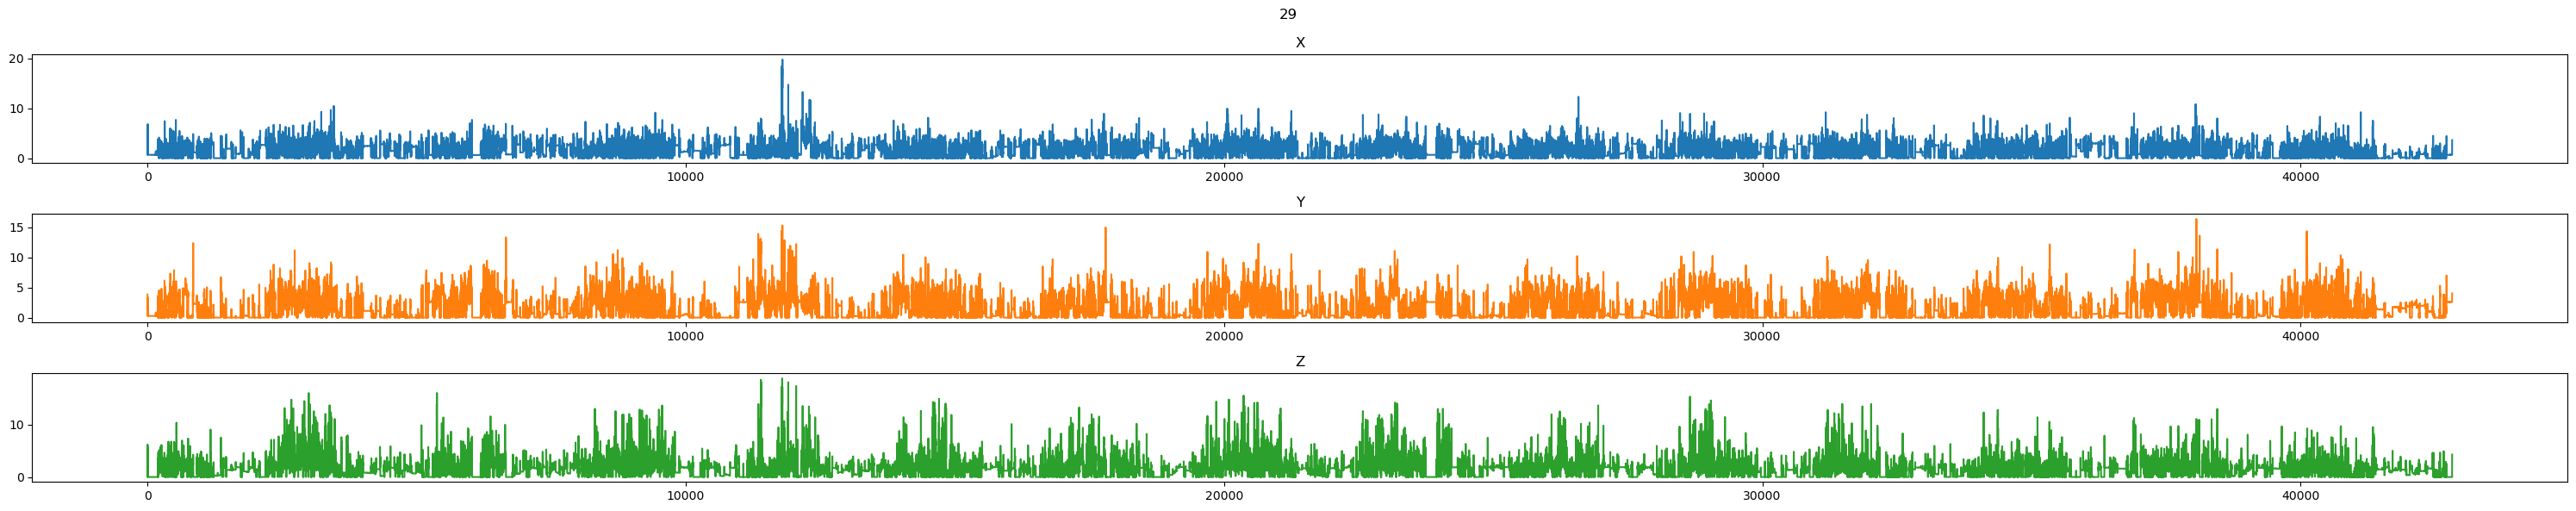

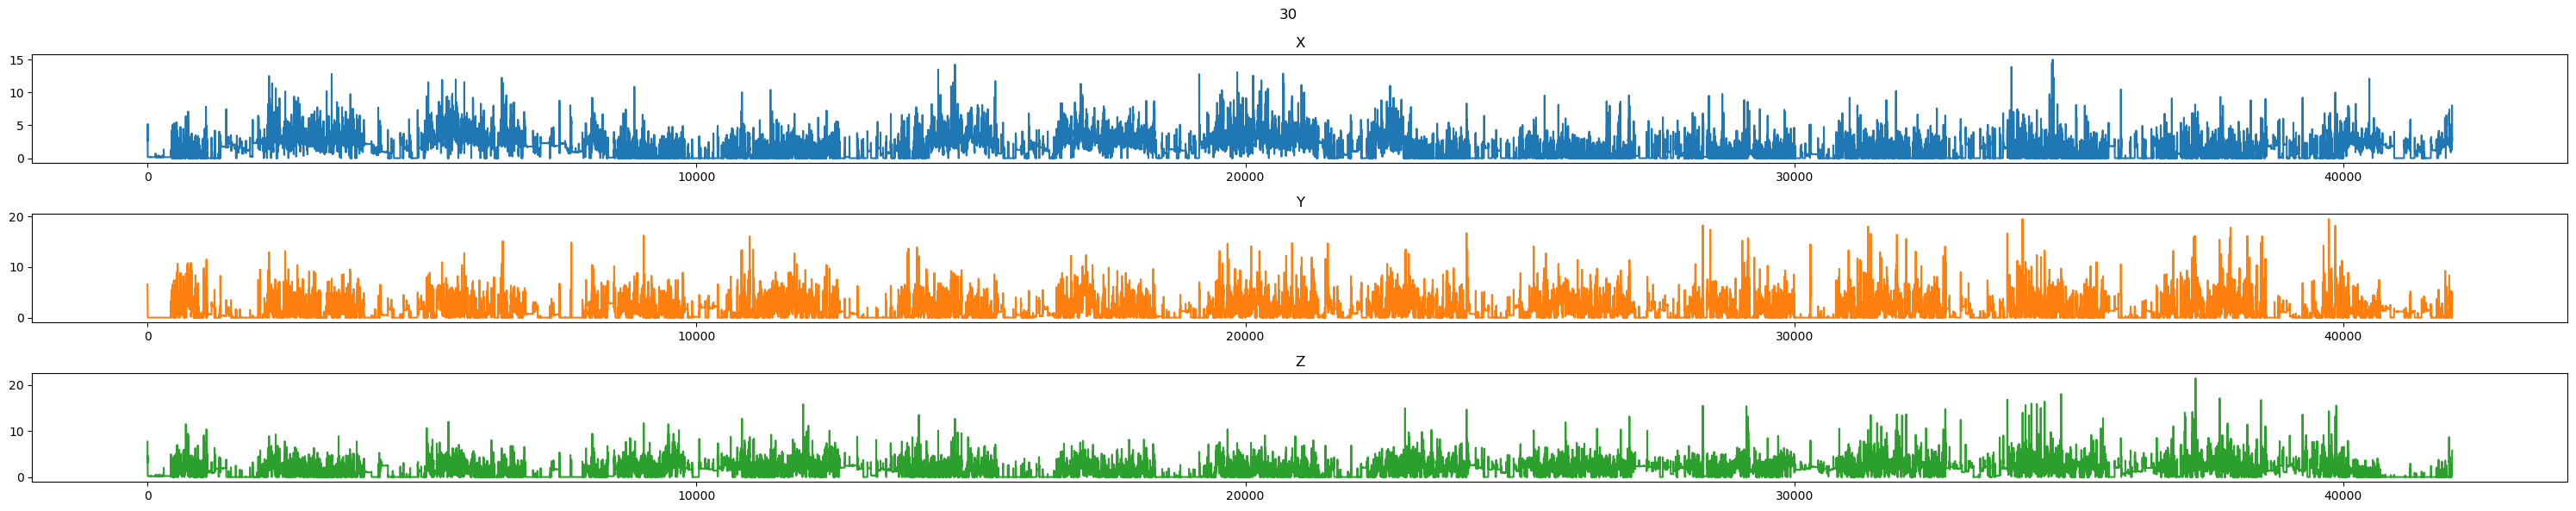

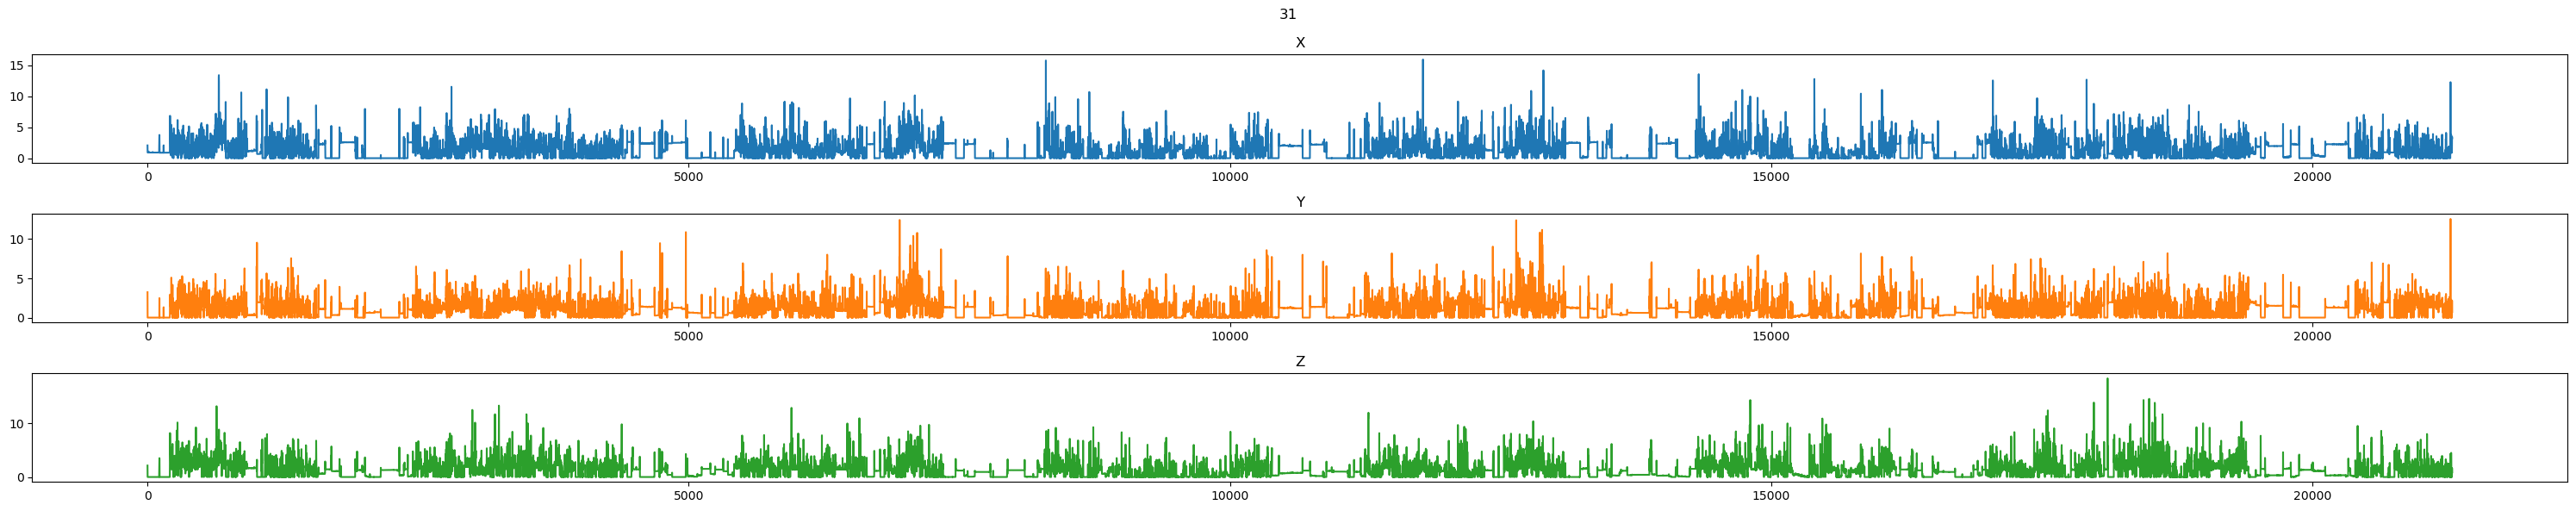

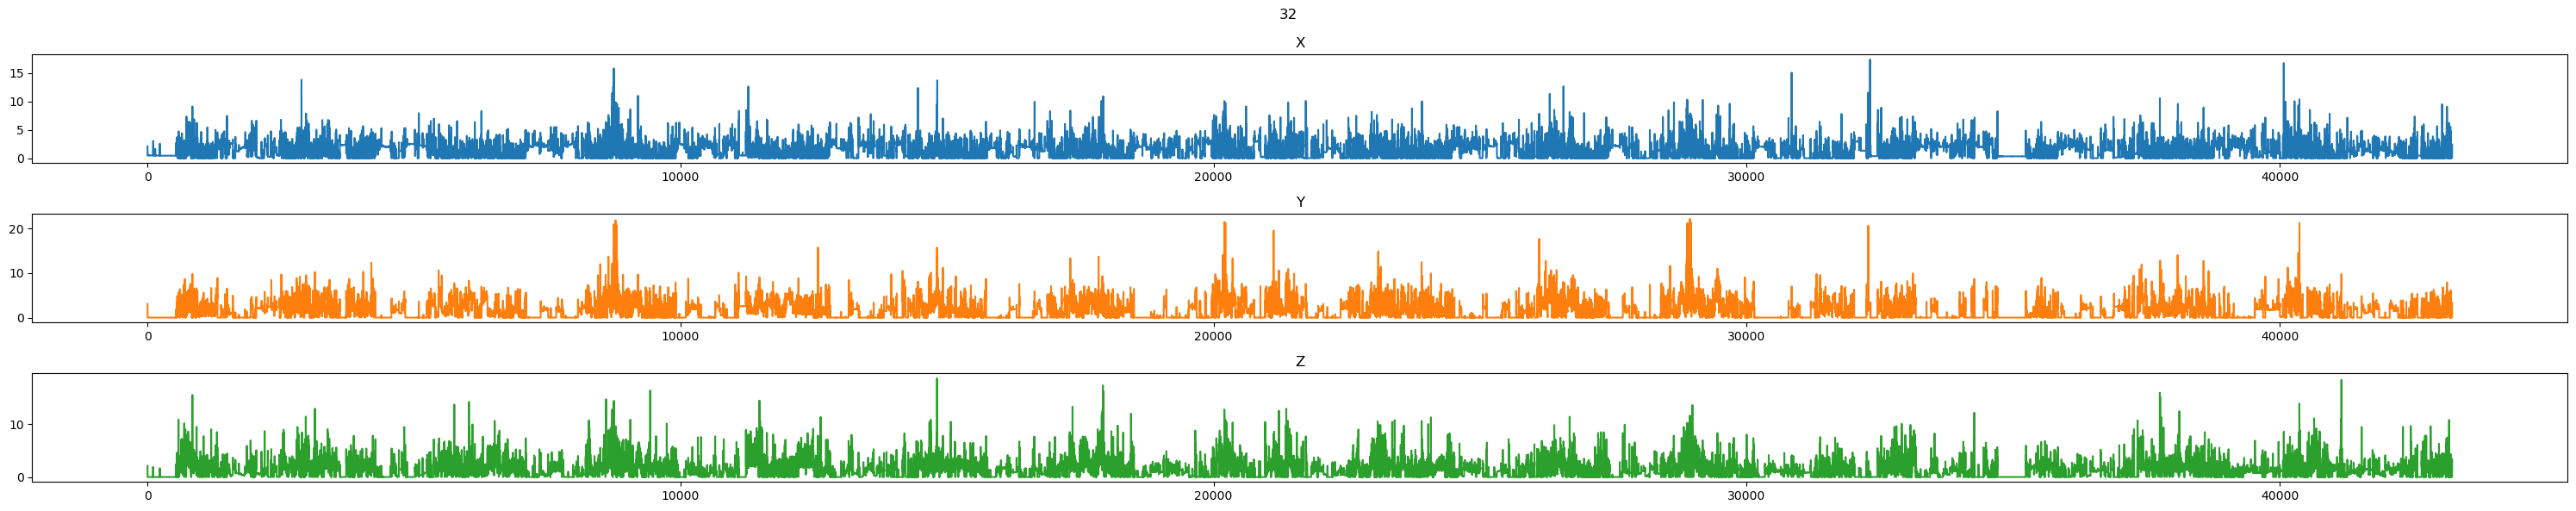

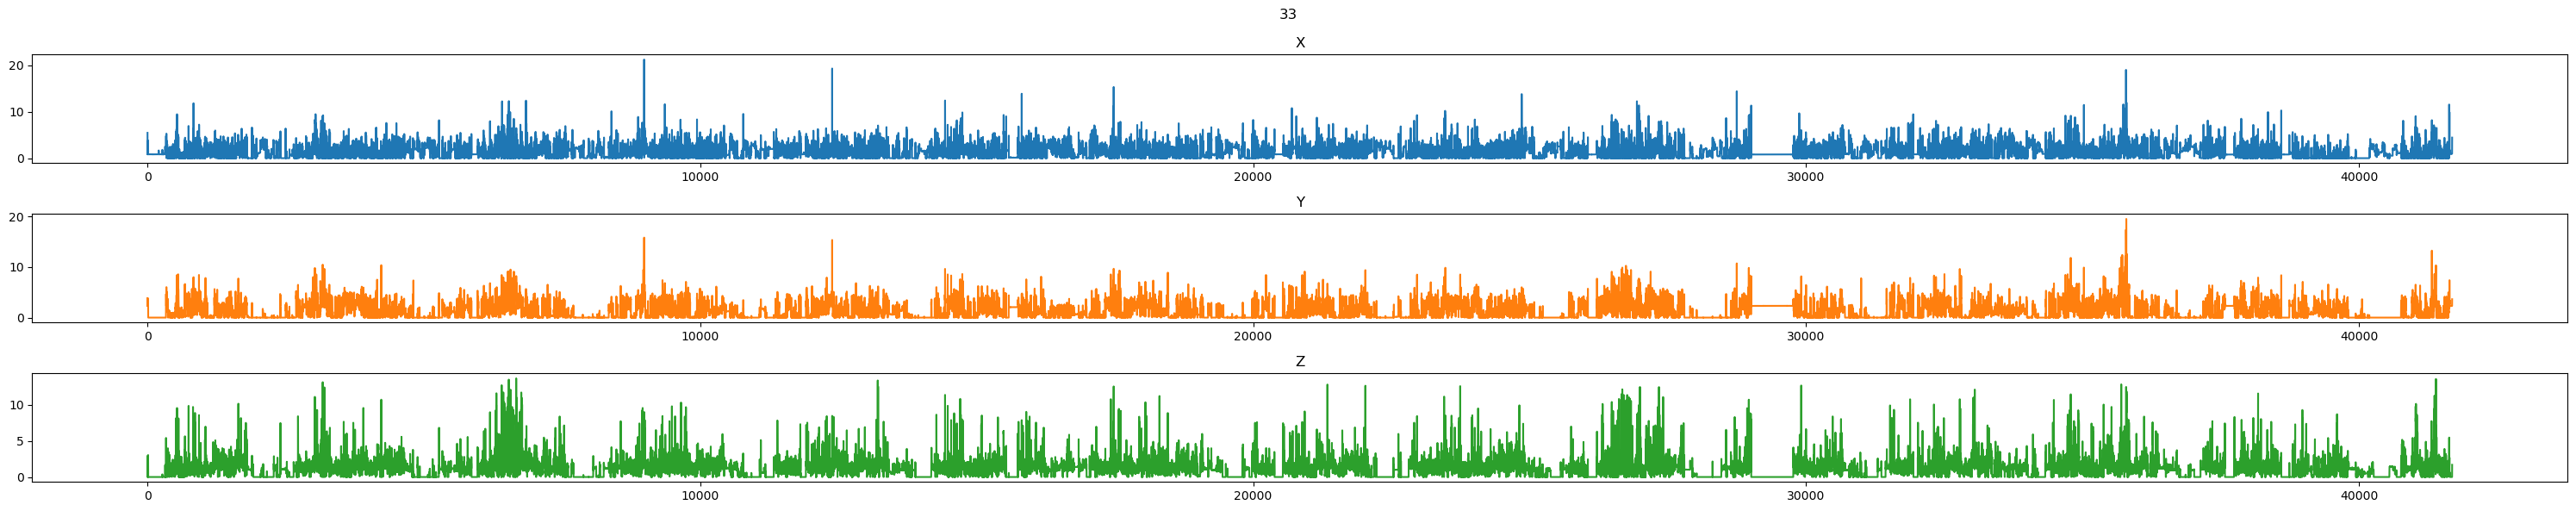

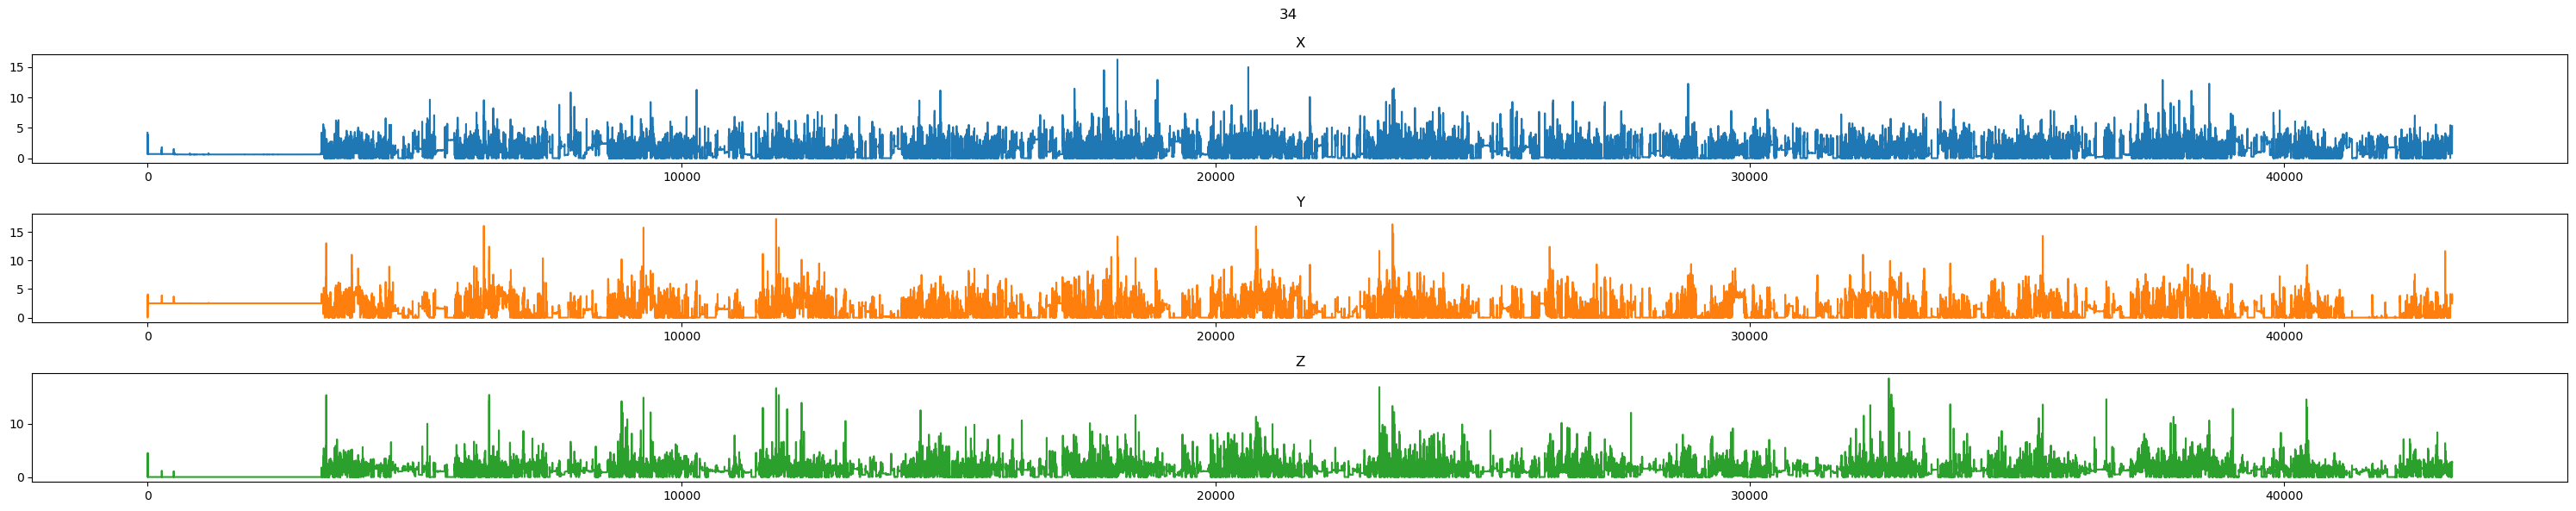

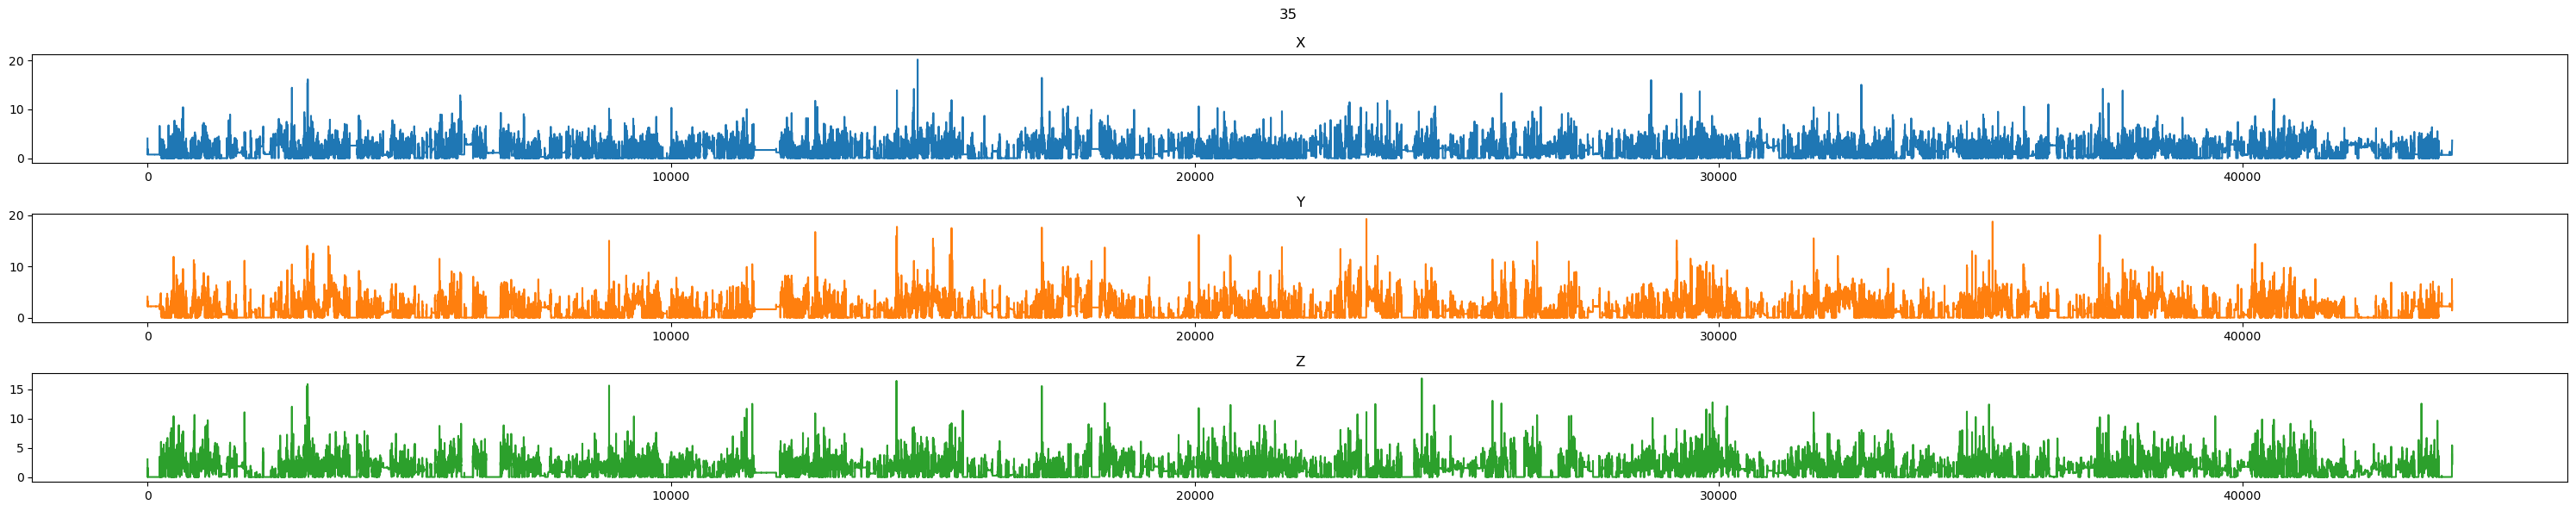

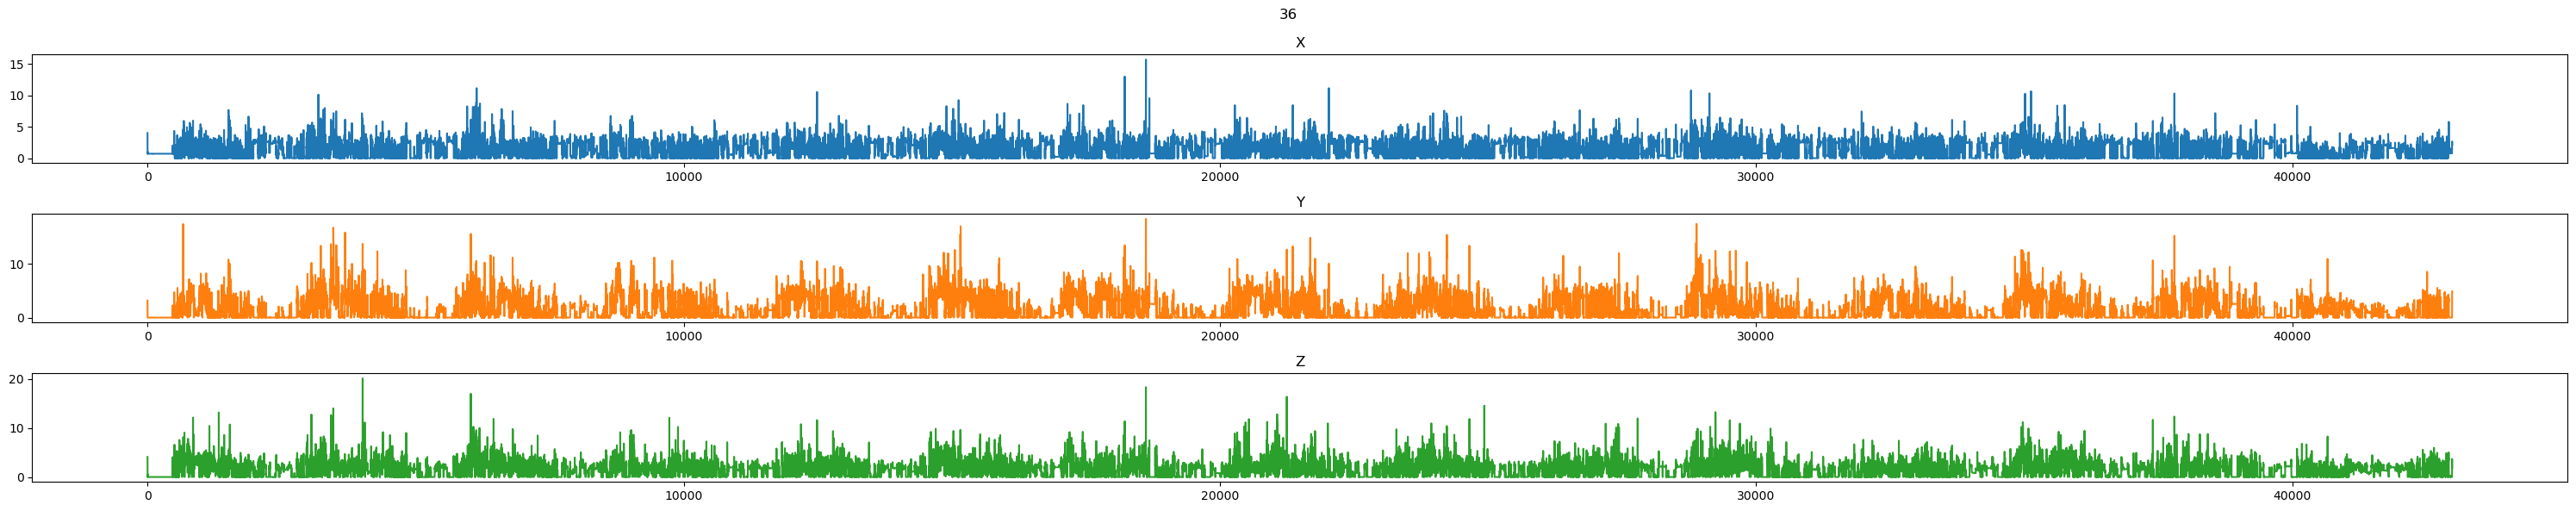

In [75]:
from utils.data_utils import read_parquet_AX3_epochs
from utils.helpers import list_all_subject_ids
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os


project_root = '/Users/sshahidi/PycharmProjects/Sleep-Wake'
# parquet_epoch_data_path = f'{project_root}/data/Wave-2/Parquet-ds'
parquet_epoch_data_path = f'{project_root}/data/Wave-2/Parquet-ds'
plot_outpath = "data/Wave-2/raw-data-plots"

os.makedirs(plot_outpath, exist_ok=True)
ids = list_all_subject_ids(parquet_epoch_data_path, 'parquet')
ids = sorted(ids)
null_pct = []
for id in ids:
    prefix = id[0]
    sub_no = int(id[1:])
    df = read_parquet_AX3_epochs(parquet_epoch_data_path, subject_prefix=prefix, subject_id=sub_no, round_timestamps=True)
        
    fig, ax = plt.subplots(3, 1, figsize=(30, 6))
    for i, feature in enumerate(['X', 'Y', 'Z']):
        signal = []
        for epoch in df[feature].apply(list):
            signal += epoch
            
        plt.subplot(3, 1, i+1)
        plt.plot(signal, color=f"C{i}")
        plt.title(feature)
    
    plt.suptitle(id)
    plt.tight_layout()
    plt.savefig(f"{plot_outpath}/{id}.png")
    plt.close

# nulls_df = pd.DataFrame(null_pct).sort_values('id')
# display(nulls_df)